In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
product = pd.read_csv('product.csv', on_bad_lines='skip')
click_stream = pd.read_csv('new_session_id.csv', on_bad_lines='skip')
customer = pd.read_csv('customer.csv')
transaction = pd.read_csv('transaction_new.csv')

### 결제수단만

In [4]:
# 같은 날짜에 같은 아이디가 있는 경우 첫 번째 행만 선택 → 결제수단만 확인
transaction_sort = transaction.sort_values(['created_at', 'customer_id'])
transaction_price = transaction_sort.groupby(['created_at', 'customer_id']).first().reset_index()

In [5]:
transaction_price[transaction_price['payment_status']=='Success'].groupby('payment_method').size().sort_values()

payment_method
LinkAja         72006
Debit Card     131311
OVO            162008
Gopay          163947
Credit Card    286692
dtype: int64

### 배송limit과 created_at 시간의 차이

In [14]:
transaction['created_at'] = pd.to_datetime(transaction['created_at'])
transaction['shipment_date_limit'] = pd.to_datetime(transaction['shipment_date_limit'])

In [16]:
transaction['diff'] = transaction['shipment_date_limit'] - transaction['created_at']

In [18]:
transaction.sort_values('diff')

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,diff
167107,2017-05-03 06:28:16.118897+00:00,50816,6eab1a8b-d64c-4f2a-83af-de3a9a401099,18845a1a-7e81-405b-8d6a-7cde65836f0e,Debit Card,Success,8888,XX2022,10000,2017-05-04 06:28:18.319350+00:00,-7.754359,111.976714,395128,17055,1,394016,1 days 00:00:02.200453
412513,2019-08-03 02:18:11.208735+00:00,55876,ae407a37-831d-4eb9-a339-6481b0a5558f,4d91c5cb-2f3c-4992-acfe-d7b76cac485c,Gopay,Success,2643,WEEKENDSERU,10000,2019-08-04 02:18:13.852384+00:00,-6.157641,106.955040,134986,58337,1,127629,1 days 00:00:02.643649
199738,2021-05-18 17:14:33.268116+00:00,48712,9e966116-9ad5-4d11-a1ed-783a03f162d0,1b86f750-3e58-48e7-8747-00d842d8aba4,OVO,Success,0,NaN,10000,2021-05-19 17:14:36.325905+00:00,-8.697154,117.115700,305779,57155,1,295779,1 days 00:00:03.057789
814654,2017-03-09 11:22:34.974857+00:00,31173,4e8b3095-1a51-4fc2-a6ed-2765c979bad1,6e9637f5-4670-4ef8-accf-c8ac345ebe85,Credit Card,Success,11206,SC2022,10000,2017-03-10 11:22:39.052269+00:00,-6.729688,108.047370,491802,27453,1,493008,1 days 00:00:04.077412
619419,2018-12-23 02:01:32.032859+00:00,32104,f412cf6f-5f61-42b6-ae89-4dcec7151b01,ba5c6915-37cd-48b6-b1cd-5003e3934305,LinkAja,Success,6844,WEEKENDSERU,50000,2018-12-24 02:01:36.594425+00:00,-0.489749,100.945640,159196,5259,1,116040,1 days 00:00:04.561566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085561,2022-05-01 03:07:01.911327+00:00,49010,cd96859a-3e21-42b8-a9d7-113864795207,cda22d51-f887-4bf2-9773-4547b4949521,Credit Card,Success,0,NaN,0,2022-05-07 04:07:00.373061+00:00,-7.912278,113.016161,3042296,53579,1,285242,6 days 00:59:58.461734
1085560,2022-05-01 03:07:01.911327+00:00,49010,cd96859a-3e21-42b8-a9d7-113864795207,cda22d51-f887-4bf2-9773-4547b4949521,Credit Card,Success,0,NaN,0,2022-05-07 04:07:00.373061+00:00,-7.912278,113.016161,3042296,36797,1,313836,6 days 00:59:58.461734
420633,2020-05-29 10:50:08.778846+00:00,22494,60955f60-9442-44a0-a354-15983ec56bc5,f84cb1ae-b66e-4b89-a786-6c65e16a5d24,Debit Card,Success,0,NaN,0,2020-06-04 11:50:07.704592+00:00,-6.216826,106.744874,247168,41857,1,247168,6 days 00:59:58.925746
628341,2022-06-03 17:26:10.413415+00:00,77754,70758b61-32b5-41fc-9495-056491056d37,b74be18e-c206-4a9d-a3e2-b0ffbeb6935c,Credit Card,Success,0,NaN,10000,2022-06-09 18:26:09.403175+00:00,1.560949,117.186424,295222,25300,1,285222,6 days 00:59:58.989760


In [19]:
transaction[transaction['payment_status']=='Failed'].sort_values('diff')

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,diff
137626,2021-05-26 07:15:03.204353+00:00,43208,5efa0cd9-77de-4611-81ea-0422f7f207ad,225f7bc9-5f58-42e1-b2f1-2ff46e5aa2ae,Debit Card,Failed,0,NaN,0,2021-05-27 07:15:09.446617+00:00,-6.425866,106.462029,156688,4275,1,156688,1 days 00:00:06.242264
279431,2022-07-10 02:19:06.995110+00:00,66334,212060e1-0c5e-4c1a-b951-b5076dbb587a,811a5031-0b9b-4b0d-9daa-c50e76494320,Credit Card,Failed,3871,WEEKENDSERU,10000,2022-07-11 02:19:50.134847+00:00,-5.034742,104.432063,224582,48399,1,218453,1 days 00:00:43.139737
701034,2018-01-28 10:31:53.406454+00:00,7411,ecdd1b58-67fe-4521-ab03-35f906ecfb46,8b532317-47b1-43ff-87e4-30d47d0937ed,Debit Card,Failed,0,NaN,10000,2018-01-29 10:33:07.360506+00:00,-6.916394,107.948974,609606,16434,2,187248,1 days 00:01:13.954052
701033,2018-01-28 10:31:53.406454+00:00,7411,ecdd1b58-67fe-4521-ab03-35f906ecfb46,8b532317-47b1-43ff-87e4-30d47d0937ed,Debit Card,Failed,0,NaN,10000,2018-01-29 10:33:07.360506+00:00,-6.916394,107.948974,609606,13039,1,225110,1 days 00:01:13.954052
1193634,2022-03-22 19:19:10.403067+00:00,64212,479a4c77-a43e-4772-a793-98376dd9b4d4,3a9af8b8-dd45-4b2a-9abb-0449cd181e84,OVO,Failed,0,NaN,0,2022-03-23 19:20:43.390644+00:00,-6.198299,106.799304,1477809,18856,1,380485,1 days 00:01:32.987577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374320,2019-09-05 19:59:49.282669+00:00,65192,6e033364-a8b0-43c6-9705-cd3ce564e431,a5564084-912c-450a-8705-0ab5e1af629c,OVO,Failed,0,NaN,0,2019-09-11 20:58:47.243186+00:00,-7.793636,109.772443,211468,28194,2,105734,6 days 00:58:57.960517
613239,2022-01-23 00:06:10.030476+00:00,68798,bb558828-ef08-492c-ad4c-92dc350b4b82,09dad622-31a9-401c-bba5-a55f2bf2b271,Credit Card,Failed,0,NaN,15000,2022-01-29 01:05:12.815944+00:00,-7.025344,109.832346,354333,49747,1,339333,6 days 00:59:02.785468
284207,2018-03-13 12:10:44.697010+00:00,2052,dce0d510-30d5-4203-80bd-b70069ff0a3d,e4aec198-8a57-4afc-927c-fe9e9038e892,Debit Card,Failed,6098,XX2022,15000,2018-03-19 13:10:00.085322+00:00,-6.253472,106.922672,319312,8927,2,155205,6 days 00:59:15.388312
1106721,2020-02-16 19:07:48.580347+00:00,989,68a80aa3-cb71-4704-a14f-fc859f03bf7c,b5aa5d50-ee1f-4005-9642-2bb5d4f638a6,Credit Card,Failed,0,NaN,0,2020-02-22 20:07:11.663297+00:00,-6.956997,111.855537,146180,4187,1,146180,6 days 00:59:23.082950


In [23]:
print(transaction[transaction['payment_status']=='Success']['diff'].describe())

print(transaction[transaction['payment_status']=='Failed']['diff'].describe())


count                      1201035
mean     3 days 12:25:16.035042267
std      1 days 10:40:10.838532517
min         1 days 00:00:02.200453
25%      2 days 06:07:19.364837500
50%         3 days 12:24:59.945925
75%      4 days 18:33:41.034416500
max         6 days 00:59:59.332085
Name: diff, dtype: object
count                        53550
mean     3 days 12:27:50.326388224
std      1 days 10:45:37.263444598
min         1 days 00:00:06.242264
25%         2 days 06:08:21.085106
50%         3 days 12:51:48.558973
75%         4 days 18:29:32.786778
max         6 days 00:59:31.980284
Name: diff, dtype: object


In [20]:
transaction['diff'].describe()

count                      1254585
mean     3 days 12:25:22.620727236
std      1 days 10:40:24.742820595
min         1 days 00:00:02.200453
25%         2 days 06:07:20.309070
50%         3 days 12:26:12.084356
75%         4 days 18:33:17.832262
max         6 days 00:59:59.332085
Name: diff, dtype: object

In [24]:
transaction['shipment_fee'].describe()

count    1.254585e+06
mean     9.190860e+03
std      9.371999e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+04
75%      1.000000e+04
max      5.000000e+04
Name: shipment_fee, dtype: float64

### 위치별 거래 패턴 파악

In [33]:
print('location의 개수 : ',customer.home_location.count())
print('location의 unique값 : ',customer.home_location.nunique())

location의 개수 :  100000
location의 unique값 :  33


In [68]:
buy_count = transaction_price[transaction_price['payment_status']=='Success'].groupby('customer_id')['session_id'].count()

In [69]:
buy_count_df = buy_count.to_frame(name='count').reset_index()

In [70]:
buy_count_df

,customer_id,count
0,3,49
1,8,7
2,9,6
3,11,1
4,15,5
...,...,...
50237,99992,12
50238,99995,59
50239,99997,1
50240,99998,8


In [71]:
for i, row in buy_count_df.iterrows():
    customer_id = row['customer_id']
    count = row['count']
    
    if customer_id in customer['customer_id'].values:
        customer.loc[customer['customer_id'] == customer_id, 'count'] = count
    else:
        customer.loc[customer['customer_id'] == customer_id, 'count'] = 0

In [72]:
purchase_count_by_location = customer.groupby('home_location')['count'].sum().sort_values(ascending=False)


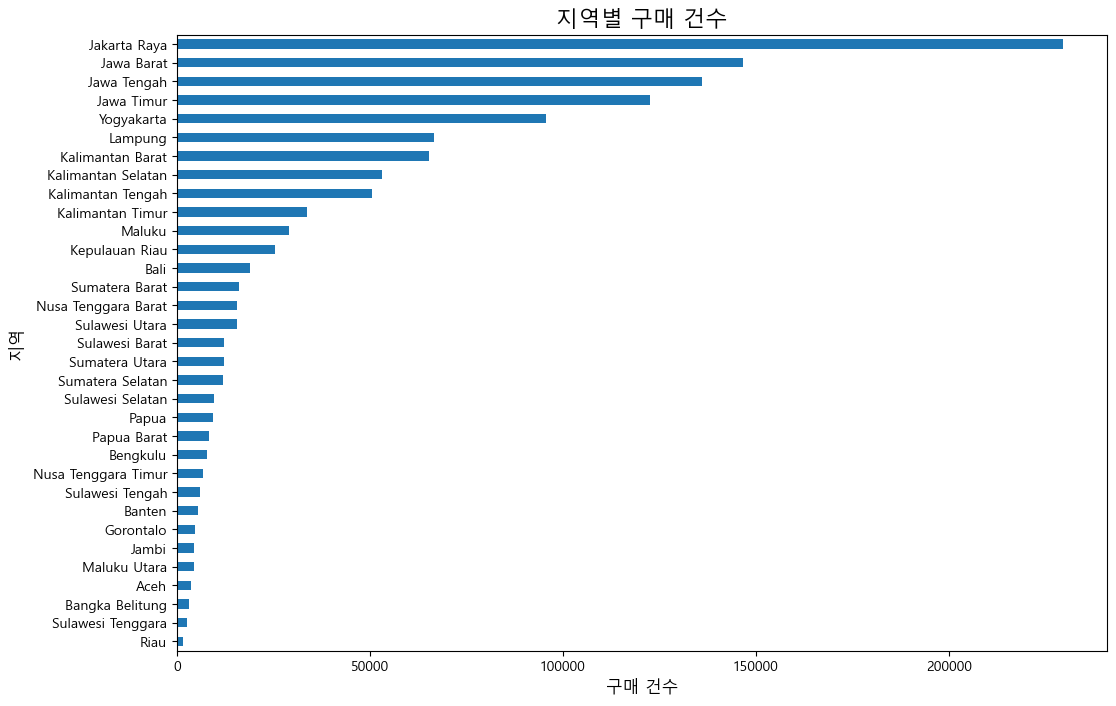

In [73]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12, 8))
purchase_count_by_location.sort_values(ascending=True).plot(kind='barh')

plt.title('지역별 구매 건수', fontsize=16)
plt.xlabel('구매 건수', fontsize=12)
plt.ylabel('지역', fontsize=12)

plt.show()


#### 지출액이 많은 지역

In [74]:
buy_total = transaction_price[transaction_price['payment_status']=='Success'].groupby('customer_id')['total_amount'].sum()

In [76]:
buy_total_df = buy_total.to_frame(name='purchase').reset_index()

In [77]:
buy_total_df

,customer_id,purchase
0,3,20891374
1,8,3898561
2,9,2638665
3,11,197533
4,15,2134870
...,...,...
50237,99992,4352229
50238,99995,31437103
50239,99997,226461
50240,99998,6692540


In [86]:
buy_total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50242 entries, 0 to 50241
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  50242 non-null  int64
 1   purchase     50242 non-null  int64
dtypes: int64(2)
memory usage: 785.2 KB


In [90]:
for i, row in buy_total_df.iterrows():
    customer_id = row['customer_id']
    purchase = row['purchase']
    
    if customer_id in customer['customer_id'].values:
        customer.loc[customer['customer_id'] == customer_id, 'purchase'] = purchase
    else:
        customer.loc[customer['customer_id'] == customer_id, 'purchase'] = 0

In [95]:
customer['purchase'] = customer['purchase'].fillna(0).astype(int)

In [97]:
customer

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,count,purchase
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,0,0
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,0,0
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,79,45600224
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,51,0
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,1,115702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,Manah,Mustofa,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,fa1914a5-0c12-4393-8d6c-af4e4a4de6aa,Android 4.3.1,-5.203523,105.635530,Lampung,Indonesia,2020-10-17,35,15266299
99996,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.474702,95.904876,Aceh,Indonesia,2017-11-25,41,25371410
99997,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01,96,57467588
99998,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31,8,0


In [98]:
purchase_price_by_location = customer.groupby('home_location')['purchase'].sum().sort_values(ascending=False)

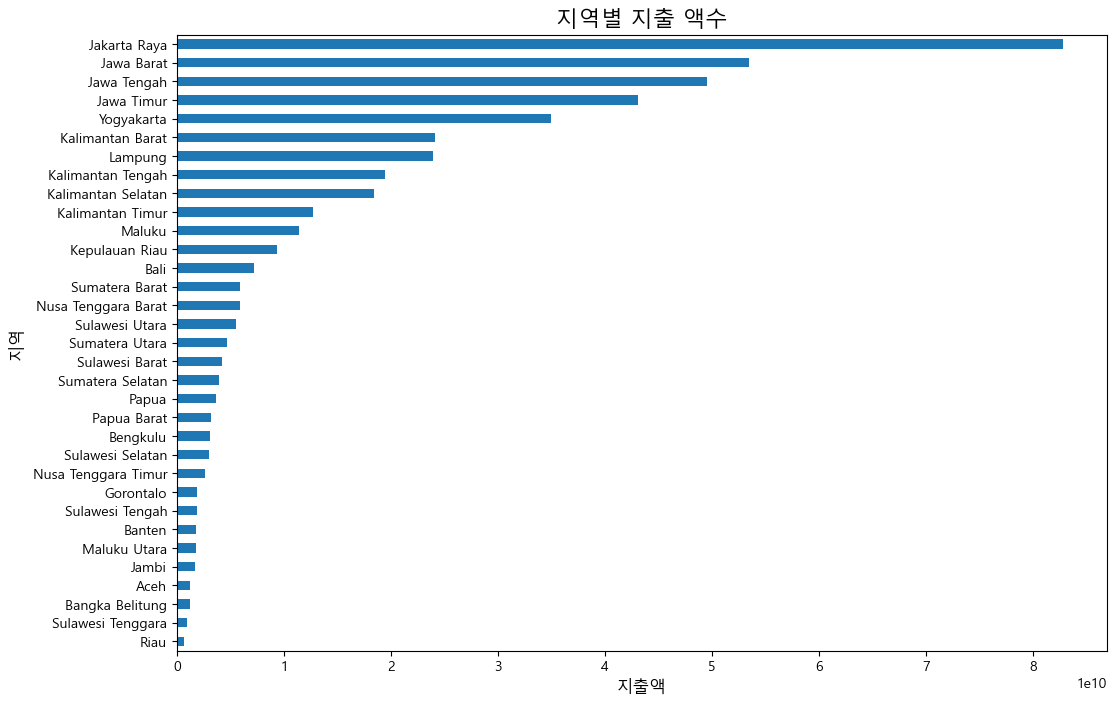

In [99]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12, 8))
purchase_price_by_location.sort_values(ascending=True).plot(kind='barh')

plt.title('지역별 지출 액수', fontsize=16)
plt.xlabel('지출액', fontsize=12)
plt.ylabel('지역', fontsize=12)

plt.show()


In [100]:
print(purchase_count_by_location)
print(purchase_price_by_location)

home_location
Jakarta Raya           229466
Jawa Barat             146777
Jawa Tengah            136143
Jawa Timur             122527
Yogyakarta              95500
Lampung                 66719
Kalimantan Barat        65384
Kalimantan Selatan      53044
Kalimantan Tengah       50483
Kalimantan Timur        33594
Maluku                  28975
Kepulauan Riau          25531
Bali                    18848
Sumatera Barat          16024
Nusa Tenggara Barat     15612
Sulawesi Utara          15554
Sulawesi Barat          12326
Sumatera Utara          12312
Sumatera Selatan        12032
Sulawesi Selatan         9639
Papua                    9444
Papua Barat              8196
Bengkulu                 7794
Nusa Tenggara Timur      6706
Sulawesi Tengah          5959
Banten                   5359
Gorontalo                4809
Jambi                    4508
Maluku Utara             4331
Aceh                     3548
Bangka Belitung          3008
Sulawesi Tenggara        2573
Riau                     1

In [101]:
customer[customer.customer_id == 3]

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,count,purchase
29119,3,Ganep,Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,106.945839,Jakarta Raya,Indonesia,2018-08-25,49,20891374


In [110]:
customer[customer['count']== 0]

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,count,purchase
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,0,0
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,0,0
5,5440,Nadia,Suartini,7bb470a0-4824-4b2c-8754-b45d98c6fa1c,7bb470a0_4824_4b2c_8754_b45d98c6fa1c@startupca...,F,1989-01-09,Android,bcb06a05-2535-4838-bd63-529528268037,Android 4.0.4,-6.277891,106.786538,Jakarta Raya,Indonesia,2021-05-30,0,0
6,90319,Banara,Wijaya,79c0c343-3ef3-4862-8f4d-591dbd9a8870,79c0c343_3ef3_4862_8f4d_591dbd9a8870@zakyfound...,M,1990-01-12,Android,4c110df9-59b6-471d-87eb-fd45c0f2868d,Android 8.1.0,0.869352,103.873668,Kepulauan Riau,Indonesia,2019-12-14,0,0
10,72203,Nalar,Kuswoyo,286f6be7-6d84-4d11-ac50-50df7722df96,286f6be7_6d84_4d11_ac50_50df7722df96@zakyfound...,M,1982-04-30,Android,cae11e7e-688d-480a-b9a2-46f44690435e,Android 2.2.2,-7.938180,110.372372,Yogyakarta,Indonesia,2017-09-02,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99955,8873,Yani,Mandasari,6eda9f7e-9191-4d76-8a17-e82707011ba7,6eda9f7e_9191_4d76_8a17_e82707011ba7@startupca...,F,2000-12-27,Android,8e21286a-5e78-4696-b312-cd3041ff577d,Android 4.1.2,-8.423330,115.030043,Bali,Indonesia,2021-12-05,0,0
99956,47088,Restu,Uyainah,ba2190af-7a96-4b75-850e-6c234a2a0be2,ba2190af_7a96_4b75_850e_6c234a2a0be2@startupca...,F,1999-11-28,Android,09d0a332-e8b9-462f-bcd7-1877bee147ec,Android 2.3.4,-6.178806,134.562656,Maluku,Indonesia,2020-06-30,0,0
99963,31512,Rachel,Susanti,236854ce-5606-4bfc-afe6-6e2db5be83b4,236854ce_5606_4bfc_afe6_6e2db5be83b4@startupca...,F,2003-05-31,Android,cce983c3-f91e-4331-8a6b-b57ba6fdb8d4,Android 1.5,-4.119058,105.485601,Lampung,Indonesia,2019-06-30,0,0
99968,31617,Wirda,Palastri,085e3e26-c033-4c0e-9f11-03438252aad5,085e3e26_c033_4c0e_9f11_03438252aad5@startupca...,F,1999-07-01,Android,74137aff-8070-47ab-a016-b784553b05c6,Android 4.2.2,-6.126077,106.770091,Jakarta Raya,Indonesia,2022-07-30,0,0


In [109]:
#customer[customer['count']== 0]
customer[customer['count']== 0].groupby('home_location')['home_location'].count().sort_values(ascending=False)

home_location
Jakarta Raya           4605
Jawa Barat             2788
Jawa Tengah            2673
Jawa Timur             2489
Yogyakarta             1855
Kalimantan Barat       1392
Lampung                1319
Kalimantan Selatan     1065
Kalimantan Tengah       944
Kalimantan Timur        656
Maluku                  618
Kepulauan Riau          431
Bali                    356
Nusa Tenggara Barat     320
Sulawesi Utara          318
Sumatera Barat          310
Sulawesi Barat          246
Sumatera Utara          245
Sumatera Selatan        206
Sulawesi Selatan        174
Nusa Tenggara Timur     168
Papua                   167
Bengkulu                166
Papua Barat             158
Sulawesi Tengah         117
Jambi                    90
Gorontalo                86
Banten                   86
Maluku Utara             76
Sulawesi Tenggara        73
Bangka Belitung          64
Aceh                     54
Riau                     27
Name: home_location, dtype: int64

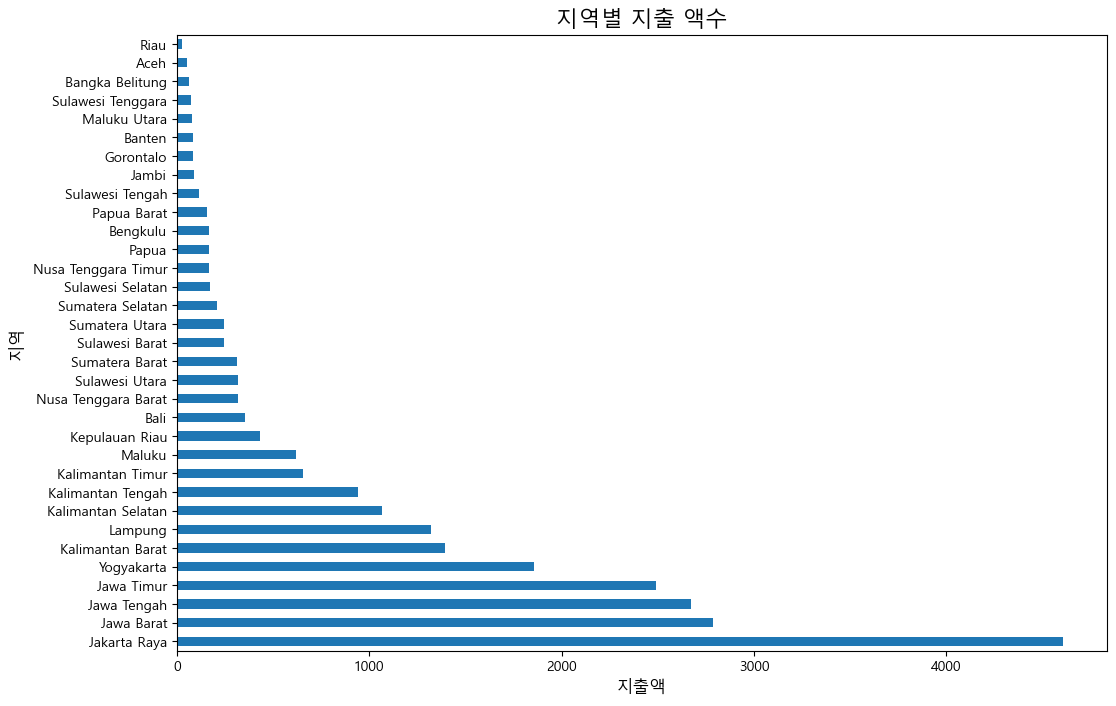

In [111]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12, 8))
not_purchase = customer[customer['count']== 0].groupby('home_location')['home_location'].count().sort_values(ascending=False)
not_purchase.plot(kind='barh')

plt.title('지역별 지출 액수', fontsize=16)
plt.xlabel('지출액', fontsize=12)
plt.ylabel('지역', fontsize=12)

plt.show()


### 중고상품 관련 분석

In [4]:
click_stream['search_keywords'].unique()

array([nan, '셔츠', '파티 드레스', '아디다스 신발', '나이키 신발', '긴 바지', '신발', '티셔츠',
       '여성 가방', '옷', '중고', '중고 상품', '바지', '직장용 가방', '시계', '샌들', '모자',
       '잠옷', '원피스'], dtype=object)

In [5]:
len(click_stream[(click_stream['search_keywords'] == '중고') & (click_stream['event_time'].str[:4] > '2020')])


108103

In [6]:
len(click_stream[(click_stream['search_keywords'] == '중고') & (click_stream['event_time'].str[:4] < '2021')])

18264

In [7]:
# 중고상품 키워드 합치기
click_stream['search_keywords'] = click_stream['search_keywords'].replace('중고 상품', '중고')

In [8]:
click_stream['search_keywords'].unique()

array([nan, '셔츠', '파티 드레스', '아디다스 신발', '나이키 신발', '긴 바지', '신발', '티셔츠',
       '여성 가방', '옷', '중고', '바지', '직장용 가방', '시계', '샌들', '모자', '잠옷', '원피스'],
      dtype=object)

In [9]:
print('21,22년 중고상품 검색 수 : ', len(click_stream[(click_stream['search_keywords'] == '중고') & (click_stream['event_time'].str[:4] > '2020')]))
print('21년 미만 중고상품 검색 수 : ',len(click_stream[(click_stream['search_keywords'] == '중고') & (click_stream['event_time'].str[:4] < '2021')]))

21,22년 중고상품 검색 수 :  123377
21년 미만 중고상품 검색 수 :  20828


In [10]:
# 중고 상품을 검색한적 있는 session 필터링
filtered_sessions = click_stream[click_stream['session_id'].isin(click_stream[(click_stream['search_keywords'] == '중고')]['session_id'])]

In [153]:
filtered_sessions

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,duration_time
66,00007415-e0e7-4a33-95e8-5bc749016876_1,HOMEPAGE,2022-07-24 13:12:21.038087+00:00,4907a117-079d-48fa-a8c4-b30d4a333a51,WEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:19
67,00007415-e0e7-4a33-95e8-5bc749016876_1,ADD_TO_CART,2022-07-24 13:12:25.038087+00:00,1462215f-37e5-486e-81af-a8314bc49122,WEB,41309.0,1.0,195528.0,NaN,NaN,NaN,NaN,0 days 00:04:19
68,00007415-e0e7-4a33-95e8-5bc749016876_1,SCROLL,2022-07-24 13:12:26.038087+00:00,104a8774-8b4f-489a-9655-042a1f22a901,WEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:19
69,00007415-e0e7-4a33-95e8-5bc749016876_1,SCROLL,2022-07-24 13:12:28.038087+00:00,a2870952-c9e5-43ae-be3b-5b7c49072b50,WEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:19
70,00007415-e0e7-4a33-95e8-5bc749016876_1,CLICK,2022-07-24 13:12:35.038087+00:00,5f60efe2-62ba-40a6-8843-e92fbb5eba18,WEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995034,fffe0edc-392a-49c1-911c-451c14cb0298_5353781,SEARCH,2022-04-21 23:02:32.711463+00:00,5511c5a3-3353-4f18-936b-174ad0676d38,MOBILE,NaN,NaN,NaN,NaN,중고,NaN,NaN,0 days 00:00:12
7995035,fffe0edc-392a-49c1-911c-451c14cb0298_5353781,ADD_PROMO,2022-04-21 23:02:44.711463+00:00,1f73bbd3-b034-4832-80b1-1c2125d65987,MOBILE,NaN,NaN,NaN,NaN,NaN,BUYMORE,6685.0,0 days 00:00:12
7995081,fffe5ead-3b3d-442b-9b1d-99c91412e8f5_5353815,ADD_PROMO,2022-05-22 20:55:27.951998+00:00,a4e4ef5c-376e-407b-96eb-7addc6bf52d7,MOBILE,NaN,NaN,NaN,NaN,NaN,BUYMORE,4090.0,0 days 00:24:39
7995082,fffe5ead-3b3d-442b-9b1d-99c91412e8f5_5353815,SEARCH,2022-05-22 21:20:06.951998+00:00,7a721cab-d811-4b1d-9e0a-9d8f2c26cf8e,MOBILE,NaN,NaN,NaN,NaN,중고,NaN,NaN,0 days 00:24:39


In [11]:
filtered_sessions['session_id'].unique()

array(['00007415-e0e7-4a33-95e8-5bc749016876_1',
       '0000b1a6-8dca-4fb3-b1db-ccde1791a330_18',
       '00016815-cf29-45fa-8974-17c6796aab29_155', ...,
       'fffe0edc-392a-49c1-911c-451c14cb0298_5353781',
       'fffe5ead-3b3d-442b-9b1d-99c91412e8f5_5353815',
       'ffffdf8e-dea1-42bc-9839-7662675c0d38_5353918'], dtype=object)

In [173]:
# 38분이 걸려도 진행 X -> 다른방법으로 진행 필요
'''
next_rows = []

for session_id in filtered_sessions['session_id']:
    session_data = filtered_sessions[filtered_sessions['session_id'] == session_id].sort_values('event_time')
    index = session_data[session_data['search_keywords'] == '중고'].index
    
    if len(index) > 0:
        next_row_index = index[0] + 1

        if next_row_index < len(session_data):
            next_row = session_data.iloc[next_row_index]
            next_rows.append(next_row)

next_rows_df = pd.DataFrame(next_rows)
'''

"\nnext_rows = []\n\nfor session_id in filtered_sessions['session_id']:\n    session_data = filtered_sessions[filtered_sessions['session_id'] == session_id].sort_values('event_time')\n    index = session_data[session_data['search_keywords'] == '중고'].index\n    \n    if len(index) > 0:\n        next_row_index = index[0] + 1\n\n        if next_row_index < len(session_data):\n            next_row = session_data.iloc[next_row_index]\n            next_rows.append(next_row)\n\nnext_rows_df = pd.DataFrame(next_rows)\n"

In [416]:
# 496분소요ㅠㅠ -> colab으로 처리
"""
session_len = len(filtered_sessions['session_id'].unique())
#filtered_sessions['session_id'].unique()[]

next_rows = []

for i in range(0, session_len):
    session_id = filtered_sessions['session_id'].unique()[i]
    session_data = filtered_sessions[filtered_sessions['session_id'] == session_id]
    index = session_data[session_data['search_keywords'] == '중고'].index

    if len(index) > 0:
        next_row_index = index[0] + 1
        next_row = session_data.loc[session_data.index == next_row_index]
        next_rows.append(next_row)

next_rows_df = pd.concat(next_rows)"""

"\nsession_len = len(filtered_sessions['session_id'].unique())\n#filtered_sessions['session_id'].unique()[]\n\nnext_rows = []\n\nfor i in range(0, session_len):\n    session_id = filtered_sessions['session_id'].unique()[i]\n    session_data = filtered_sessions[filtered_sessions['session_id'] == session_id]\n    index = session_data[session_data['search_keywords'] == '중고'].index\n\n    if len(index) > 0:\n        next_row_index = index[0] + 1\n        next_row = session_data.loc[session_data.index == next_row_index]\n        next_rows.append(next_row)\n\nnext_rows_df = pd.concat(next_rows)"

In [12]:
filtered_sessions_light = filtered_sessions[['session_id', 'event_name', 'event_time','search_keywords']]

In [13]:
filtered_sessions_light

,session_id,event_name,event_time,search_keywords
66,00007415-e0e7-4a33-95e8-5bc749016876_1,HOMEPAGE,2022-07-24 13:12:21.038087+00:00,NaN
67,00007415-e0e7-4a33-95e8-5bc749016876_1,ADD_TO_CART,2022-07-24 13:12:25.038087+00:00,NaN
68,00007415-e0e7-4a33-95e8-5bc749016876_1,SCROLL,2022-07-24 13:12:26.038087+00:00,NaN
69,00007415-e0e7-4a33-95e8-5bc749016876_1,SCROLL,2022-07-24 13:12:28.038087+00:00,NaN
70,00007415-e0e7-4a33-95e8-5bc749016876_1,CLICK,2022-07-24 13:12:35.038087+00:00,NaN
...,...,...,...,...
7995034,fffe0edc-392a-49c1-911c-451c14cb0298_5353781,SEARCH,2022-04-21 23:02:32.711463+00:00,중고
7995035,fffe0edc-392a-49c1-911c-451c14cb0298_5353781,ADD_PROMO,2022-04-21 23:02:44.711463+00:00,NaN
7995081,fffe5ead-3b3d-442b-9b1d-99c91412e8f5_5353815,ADD_PROMO,2022-05-22 20:55:27.951998+00:00,NaN
7995082,fffe5ead-3b3d-442b-9b1d-99c91412e8f5_5353815,SEARCH,2022-05-22 21:20:06.951998+00:00,중고


In [282]:
# filtered_sessions_light.to_csv('filtered_sessions_light.csv')

In [126]:
next_rows_df_light = pd.read_csv('next_rows_df_light.csv')

In [127]:
next_rows_df_light.drop(columns=['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

In [128]:
next_rows_df_light

,session_id,event_name,event_time,search_keywords
0,00007415-e0e7-4a33-95e8-5bc749016876_1,BOOKING,2022-07-24 13:16:40.038087+00:00,NaN
1,00016815-cf29-45fa-8974-17c6796aab29_155,SEARCH,2021-04-30 00:31:35.180746+00:00,중고
2,00020c37-ec61-4e2a-b03d-bcaaad934c4c_243,SEARCH,2020-09-20 23:43:17.095453+00:00,중고
3,00020c37-ec61-4e2a-b03d-bcaaad934c4c_245,SEARCH,2020-09-21 02:08:02.095453+00:00,중고
4,000288dc-e7cf-44b9-9f2d-270015fd83c6_257,HOMEPAGE,2021-11-20 00:19:45.288196+00:00,NaN
...,...,...,...,...
135621,fffc24d3-6e47-4df3-9d6c-3b89c63fb5fc_5353640,SEARCH,2021-06-25 16:40:46.818614+00:00,중고
135622,fffd5e21-ff89-4c97-8fe5-5d59520d0699_5353733,SEARCH,2021-12-31 00:43:07.541124+00:00,중고
135623,fffe0edc-392a-49c1-911c-451c14cb0298_5353781,SEARCH,2022-04-21 23:02:32.711463+00:00,중고
135624,fffe0edc-392a-49c1-911c-451c14cb0298_5353781,ADD_PROMO,2022-04-21 23:02:44.711463+00:00,NaN


In [129]:
e = next_rows_df_light.groupby('event_name')['event_time'].count()

In [130]:
event_ratio = pd.DataFrame({'event_name':e.index,'count':e.values})

In [131]:
event_ratio['ratio'] = (event_ratio['count'] / event_ratio['count'].sum())*100

In [132]:
event_ratio['ratio'] = round(event_ratio['ratio'],1)

In [133]:
event_ratio = event_ratio.sort_values('ratio', ascending=False)

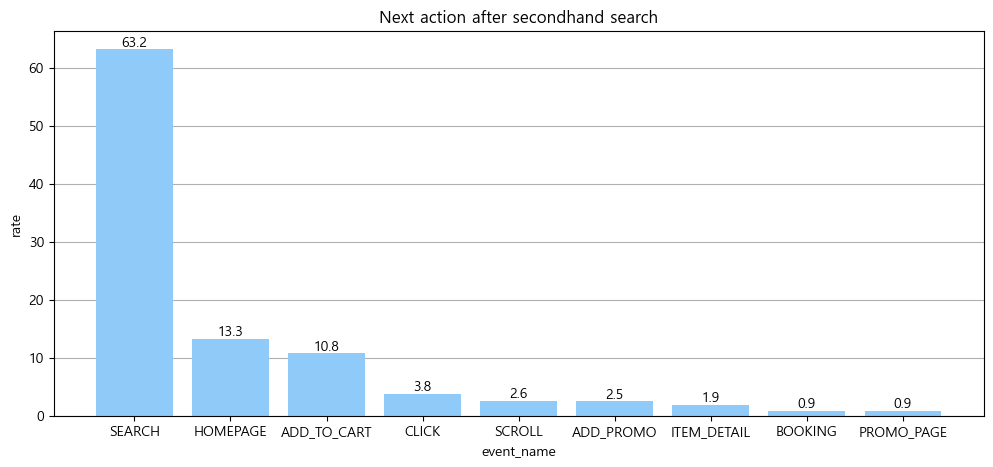

In [134]:
#plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(figsize=(12, 5))
ax.set_axisbelow(True) # 그래프 뒤에 그리드 그리기
ax.grid(True, axis='y') # y 축만 그리드 그리기

# 검색 후 다음 행동 그래프
bars = plt.bar(event_ratio['event_name'], event_ratio['ratio'], color='#90CAF9')

# 비율 텍스트 추가
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom')

plt.title('Next action after secondhand search')
plt.xlabel('event_name')
plt.ylabel('rate')
plt.show()

In [135]:
e2 = next_rows_df_light.groupby('search_keywords')['event_time'].count()

In [136]:
search_ratio = pd.DataFrame({'search_keywords':e2.index,'count':e2.values})

In [137]:
search_ratio['ratio'] = (search_ratio['count'] / search_ratio['count'].sum())*100
search_ratio['ratio'] = round(search_ratio['ratio'],1)

In [138]:
search_ratio = search_ratio.sort_values('ratio', ascending=False)

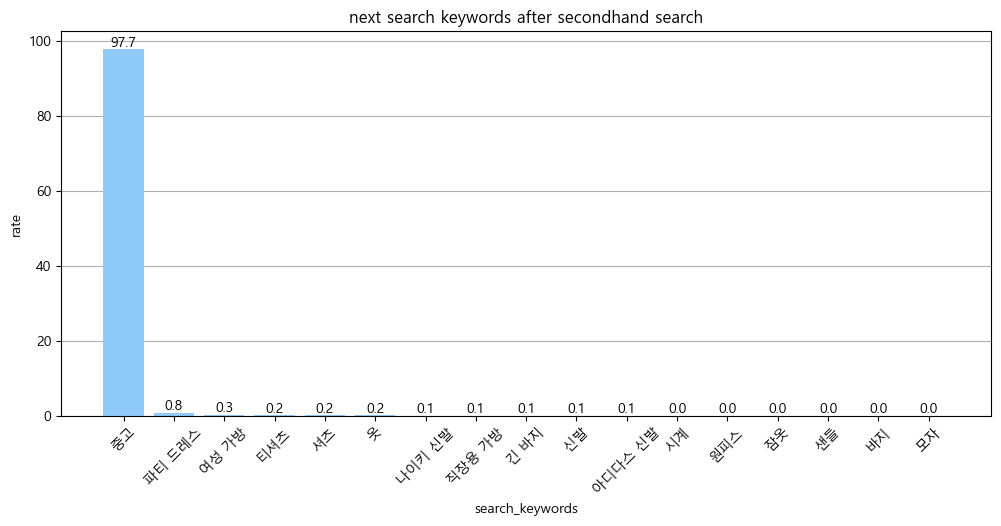

In [139]:
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(figsize=(12, 5))
ax.set_axisbelow(True) # 그래프 뒤에 그리드 그리기
ax.grid(True, axis='y') # y 축만 그리드 그리기

# 검색 후 다음 검색어
bars = plt.bar(search_ratio['search_keywords'], search_ratio['ratio'], color='#90CAF9')

# 비율 텍스트 추가
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom')

plt.title('next search keywords after secondhand search')
plt.xlabel('search_keywords')
plt.xticks(rotation= 45)
plt.ylabel('rate')
plt.show()

In [247]:
# 중고상품 담은 session
cart_session_id = next_rows_df_light[next_rows_df_light['event_name'] == 'ADD_TO_CART']['session_id'].unique()

In [248]:
cart_session_id[0]

'0004d5bf-7b3a-42b0-9c69-c5454b0b84de_337'

In [263]:
# ADD_TO_CART만 추출
click_stream_cart = click_stream[click_stream['event_name']=='ADD_TO_CART']

In [298]:
# ADD_TO_CART에서 해당 session_id의 행 추출
c =[]
for i in range(len(cart_session_id)):
    a = cart_session_id[i]
    b = click_stream_cart[click_stream_cart['session_id']==cart_session_id[i]]
    c.append(b)

In [299]:
# 모아진 list를 df로 변경
used_cart_df = pd.concat(c)

In [303]:
# 중고상품인 product_id
used_pro_id = used_cart_df['product_id'].unique()

In [311]:
used_pro_id = used_pro_id.astype(int)

In [312]:
used_pro_id

array([56225, 55818, 21666, ..., 48190, 58087, 21998])

In [316]:
# used_pro_id에서 해당 product에 중고여부 표시
for id in used_pro_id:
    if id in product['id'].values:
        product.loc[product['id'] == id, 'used'] = 1
    else:
        product.loc[product['id'] == id, 'used'] = 0

product['used'] = product['used'].fillna(0).astype(int)

In [317]:
product.head(5)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,used
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,1
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,1
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,1
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,0
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,0


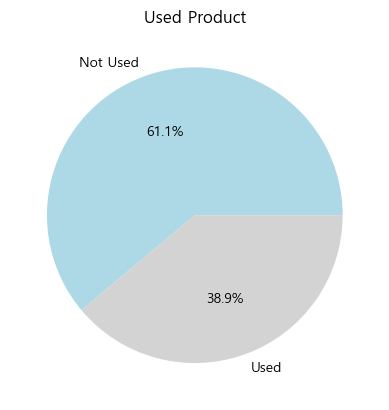

In [141]:
# 중고상품 비중(중고:1, 중고아님:0)
a = product.groupby('used')['id'].count()
labels = ['Not Used', 'Used']
colors = ['#ADD8E6', '#D3D3D3']

plt.pie(a, labels=labels, autopct='%1.1f%%',colors=colors)


plt.title('Used Product')
plt.ylabel('')
plt.show()

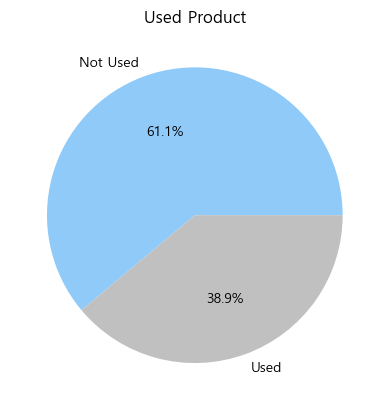

In [142]:
# 중고상품 비중(중고:1, 중고아님:0)
a = product_used.groupby('used')['id'].count()
labels = ['Not Used', 'Used']
colors = ['#90CAF9', 'silver']

plt.pie(a, labels=labels, autopct='%1.1f%%',colors=colors)


plt.title('Used Product')
plt.ylabel('')
plt.show()

In [359]:
#product[product['used']==1].groupby('subCategory')['id'].count().sort_values(ascending=False)

In [367]:
# 상품별로 판매된 개수
product_sales = transaction[transaction['payment_status']=='Success'].groupby('product_id')['quantity'].sum()

In [372]:
product_sales

product_id
1163     38
1164     27
1165     30
1525     47
1526     30
         ..
59995    26
59996    27
59998    32
59999    31
60000    50
Name: quantity, Length: 44446, dtype: int64

In [380]:
product_sales.index

Index([ 1163,  1164,  1165,  1525,  1526,  1528,  1529,  1530,  1531,  1532,
       ...
       59990, 59991, 59992, 59993, 59994, 59995, 59996, 59998, 59999, 60000],
      dtype='int64', name='product_id', length=44446)

In [387]:
product_sales.values[0]

38

In [388]:
# product_sales 해당 product에 판매개수 표시
for i in range(len(product_sales)):
    id = product_sales.index[i]
    sales = product_sales.values[i]
    
    if id in product['id']:
        product.loc[product['id'] == id, 'sales_count'] = sales
    else:
        product.loc[product['id'] == id, 'sales_count'] = 0

product['sales_count'] = product['sales_count'].fillna(0).astype(int)

In [395]:
product[product['sales_count']==0].groupby('used').count()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,sales_count
used,,,,,,,,,,,
0,6951,6951,6951,6951,6951,6948,6951,6951,6777,6949,6951
1,4331,4331,4331,4331,4331,4331,4330,4330,4230,4331,4331


In [392]:
product.groupby('used')['sales_count'].sum()

used
0    791949
1    530409
Name: sales_count, dtype: int32

In [414]:
#product.to_csv('prodcut_used.csv')

In [415]:
# transaction에 product 중고여부 입력 (캐글에서 처리)
'''
for i in range(len(transaction_used)):
    pro_id = transaction_used['product_id'][i]
    if pro_id in product['id'].values:
        used_value = product.loc[product['id'] == pro_id, 'used'].values[0]
        transaction_used.loc[transaction_used['product_id'] == pro_id, 'used'] = used_value
'''

"\nfor i in range(len(transaction_used)):\n    pro_id = transaction_used['product_id'][i]\n    if pro_id in product['id'].values:\n        used_value = product.loc[product['id'] == pro_id, 'used'].values[0]\n        transaction_used.loc[transaction_used['product_id'] == pro_id, 'used'] = used_value\n"

In [3]:
product_used = pd.read_csv('prodcut_used.csv')

In [5]:
product_used = product_used.drop(columns='Unnamed: 0',axis=1)

In [6]:
product_used

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,used,sales_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,1,39
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,1,35
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,1,0
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,0,45
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,0,26
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,0,55
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,1,41
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,0,0


In [539]:
# 중고상품 카테고리별 판매 개수
product[(product['used']==1)&(product['sales_count']!=0)].groupby('masterCategory').count()

,id,gender,subCategory,articleType,baseColour,season,year,usage,productDisplayName,used,sales_count
masterCategory,,,,,,,,,,,
Accessories,3008,3008,3008,3008,3008,3008,3008,2997,3006,3008,3008
Apparel,6005,6005,6005,6005,6005,6005,6005,6004,6005,6005,6005
Footwear,3671,3671,3671,3671,3671,3659,3671,3671,3671,3671,3671
Free Items,17,17,17,17,17,17,17,17,17,17,17
Personal Care,240,240,240,240,238,240,240,238,239,240,240
Sporting Goods,8,8,8,8,8,8,8,8,8,8,8


In [544]:
# 중고상품인데 한번도 판매되지 않은 카테고리 개수
product[(product['used']==1)&(product['sales_count']==0)].groupby('masterCategory').count()

,id,gender,subCategory,articleType,baseColour,season,year,usage,productDisplayName,used,sales_count
masterCategory,,,,,,,,,,,
Accessories,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407
Apparel,1403,1403,1403,1403,1403,1402,1402,1399,1403,1403,1403
Footwear,886,886,886,886,886,886,886,886,886,886,886
Free Items,18,18,18,18,18,18,18,18,18,18,18
Personal Care,617,617,617,617,617,617,617,520,617,617,617


In [59]:
# 전체 상품 개수
print('전체상품개수: ',product_used['id'].count())

# 중고여부 상품 개수
print(product_used.groupby('used')['id'].count())

전체상품개수:  44424
used
0    27144
1    17280
Name: id, dtype: int64


In [74]:
# 검색이 있는 경우 df
click_stream_search = click_stream[click_stream['search_keywords'].notnull() == True]

In [78]:
# 검색기록이 있는 경우의 개수
click_stream_search['session_id'].count()

752464

In [77]:
# 중고상품 검색한 경우의 개수 (전체연도)
click_stream_search[click_stream_search['search_keywords']=='중고']['session_id'].count()

126367

In [110]:
print('20년도 검색한 개수 : ',len(click_stream_search[(click_stream_search['event_time'].str[:4] == '2020')]))
print('21년도 검색한 개수 : ',len(click_stream_search[(click_stream_search['event_time'].str[:4] == '2021')]))
print('22년도 검색한 개수 : ',len(click_stream_search[(click_stream_search['event_time'].str[:4] == '2022')]))

20년도 검색한 개수 :  107851
21년도 검색한 개수 :  350292
22년도 검색한 개수 :  294321


In [114]:
print('20년도 중고 검색수 : ',click_stream_search[(click_stream_search['event_time'].str[:4] == '2020')&(click_stream_search['search_keywords']=='중고')]['session_id'].count())
print('21년도 중고 검색수 : ',click_stream_search[(click_stream_search['event_time'].str[:4] == '2021')&(click_stream_search['search_keywords']=='중고')]['session_id'].count())
print('22년도 중고 검색수 : ',click_stream_search[(click_stream_search['event_time'].str[:4] == '2022')&(click_stream_search['search_keywords']=='중고')]['session_id'].count())

20년도 중고 검색수 :  18264
21년도 중고 검색수 :  58776
22년도 중고 검색수 :  49327


In [113]:
click_stream_search[(click_stream_search['event_time'].str[:4] == '2021')&(click_stream_search['search_keywords']=='중고')]['session_id'].count()

58776

In [90]:
len(click_stream_search[(click_stream_search['event_time'].str[:4] > '2020')])

644613

In [93]:
search_count = click_stream_search[(click_stream_search['event_time'].str[:4] > '2020')].groupby('search_keywords')['session_id'].count().sort_values(ascending=True)

In [96]:
search_count_ratio = round((search_count / len(click_stream_search[(click_stream_search['event_time'].str[:4] > '2020')]))*100,2)

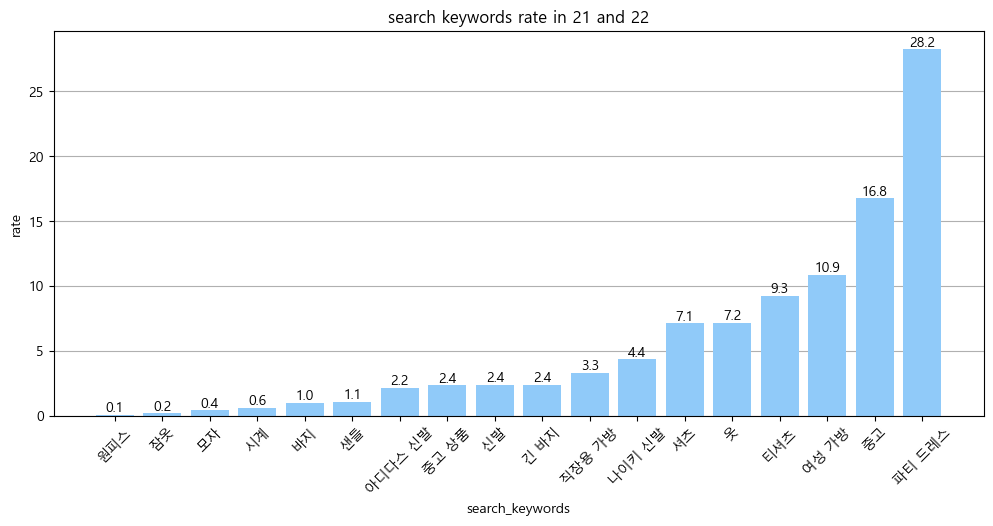

In [124]:
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(figsize=(12, 5))
ax.set_axisbelow(True) # 그래프 뒤에 그리드 그리기
ax.grid(True, axis='y') # y 축만 그리드 그리기

# 서치키워드 비율
bars = plt.bar(search_count_ratio.index, search_count_ratio.values, color="#90CAF9")

# 비율 텍스트 추가
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom')

plt.title('search keywords rate in 21 and 22')
plt.xlabel('search_keywords')
plt.xticks(rotation= 45)
plt.ylabel('rate')
plt.show()

In [115]:
df = pd.read_csv('click_stream_new.csv')

In [116]:
# 검색이 있는 경우 df
df_search = df[df['search_keywords'].notnull() == True]

In [120]:
len(df_search)

1173266

In [122]:
df_search['search_keywords'].unique()

array(['Dress Kondangan', 'Tas Wanita', 'Celana Panjang', 'Kaos',
       'Sepatu', 'Tas Kerja', 'T-Shirt', 'Topi', 'Bekas', 'Baju',
       'Thrift', 'Sepatu Nike', 'Dress Pesta', 'Sepatu Adidas', 'Second',
       'T-shirt', 'Jam', 'Celana', 'Second Hand', 'Barang Bekas',
       'Sendal', 'Daster', 'Baju Tidur'], dtype=object)

#### 매출 증가 예측

In [4]:
product_used = pd.read_csv('prodcut_used.csv')

In [5]:
merged_pro_trans = pd.read_csv('merged_pro_trans.csv')

In [6]:
transaction_used = pd.read_csv('transaction_used.csv')

In [7]:
# 정렬
merged_pro_trans = merged_pro_trans.sort_values('created_at')
transaction_used = transaction_used.sort_values('created_at')

# used 추가
used_column = transaction_used['used']
merged_pro_trans['used'] = used_column

In [8]:
# sport goods의 전체 매출
merged_pro_trans[merged_pro_trans['masterCategory'] == 'Sporting Goods']['item_price'].sum()

165442461

In [15]:
sporting_goods_data  = merged_pro_trans[(merged_pro_trans['masterCategory'] == 'Sporting Goods') & merged_pro_trans['used']==1.0]
sport_sales_year = sporting_goods_data.groupby('date_year')['item_price'].sum()

In [20]:
sport_sales_year

date_year
2016      175414
2017     1217685
2018     5656906
2019     6033841
2020    10124884
2021    15889438
2022    10172206
Name: item_price, dtype: int64

In [10]:
# sport goods 평균 금액 #244737
merged_pro_trans[merged_pro_trans['masterCategory'] == 'Sporting Goods']['item_price'].mean()

244737.36834319527

In [11]:
# 전체 매출

# 같은 날짜에 같은 아이디가 있는 경우 첫 번째 행만 선택 → 총 매출 확인
transaction_sort = merged_pro_trans.sort_values(['created_at', 'customer_id'])
transaction_price = transaction_sort.groupby(['created_at', 'customer_id']).first().reset_index()

transaction_price['total_amount'].sum()

468850022169

In [12]:
# sporting goods 매출비율
165442461/468850022169 * 100

0.035286862147223104

In [42]:
# 연도별 매출
transation_sales_year = transaction_price[transaction_price['used']==1.0].groupby('date_year')['total_amount'].sum()

In [43]:
transation_sales_year

date_year
2016     1029961055
2017     7269945782
2018    15967272123
2019    24736041392
2020    37655992866
2021    57196378198
2022    43036183707
Name: total_amount, dtype: int64

In [44]:
(sport_sales_year / transation_sales_year)*100

date_year
2016    0.017031
2017    0.016750
2018    0.035428
2019    0.024393
2020    0.026888
2021    0.027780
2022    0.023636
dtype: float64

In [14]:
# 상품 전체 개수
product_used['id'].count()

44424

In [37]:
# 중고상품개수
product_used[(product_used['used']==1.0)]['id'].count()

17280

In [36]:
# 중고 스포츠 개수
product_used[(product_used['masterCategory']=='Sporting Goods') & (product_used['used']==1.0)]['id'].count()

8

In [26]:
# 스포츠 개수
product_used[product_used['masterCategory']=='Sporting Goods']['id'].count()

25

In [29]:
25/44424 * 100

0.05627588690797767

In [31]:
# 전체 상품의 0.1% 증가시키기 위함 
(product_used['id'].count()) * 0.001

44.424

In [50]:
# 중고 스포츠 개수 25% 증가 -> 2개 증가
(product_used[(product_used['masterCategory']=='Sporting Goods') & (product_used['used']==1.0)]['id'].count()) * 0.25

2.0

In [37]:
# 25+2221 => 2246개가 되었을 때의 예상매출

# 원래 평균 금액 : 244737
# 개수 : 2246개
# -> 예상 매출 : 549679302 (2246*244737)
# 이전 매출 : 165442461

'''매출 증가 평가: 이전 매출과 예상 매출을 비교하여 매출 증가율을 계산합니다. 
이를 위해 (예상 매출 - 이전 매출) / 이전 매출 * 100의 공식을 사용하여 매출 증가율'''

(549679302 - 165442461) / 165442461 * 100

232.24802065776814

In [32]:
244737*44

10768428

In [33]:
# 22년도 매출 : 10172206
# 예상매출 : 108663228

(10768428-10172206)/10172206 * 100

5.861285152896039

In [51]:
# 8 => 10개가 되었을 때의 예상매출

# 평균 금액 : 244737
# 개수 : 10개
# -> 예상 매출 : 2447370 (10*244737)
# 22년도 매출 : 10172206

'''매출 증가 평가: 이전 매출과 예상 매출을 비교하여 매출 증가율을 계산합니다. 
이를 위해 (예상 매출 - 이전 매출) / 이전 매출 * 100의 공식을 사용하여 매출 증가율'''

(2447370 - 10172206) / 10172206 * 100

-75.94061701070545

#### 중고상품 액션아이템 도출

In [56]:
product.groupby('masterCategory').count()

,id,gender,subCategory,articleType,baseColour,season,year,usage,productDisplayName
masterCategory,,,,,,,,,
Accessories,11274,11274,11274,11274,11274,11274,11274,11246,11272
Apparel,21397,21397,21397,21397,21391,21396,21396,21373,21397
Footwear,9219,9219,9219,9219,9219,9199,9219,9217,9219
Free Items,105,105,105,105,105,105,105,105,105
Home,1,1,1,1,1,1,1,1,1
Personal Care,2403,2403,2403,2403,2394,2403,2403,2140,2398
Sporting Goods,25,25,25,25,25,25,25,25,25


In [55]:
product_used[product_used['used']==1].groupby('masterCategory').count()

,Unnamed: 0,id,gender,subCategory,articleType,baseColour,season,year,usage,productDisplayName,used,sales_count
masterCategory,,,,,,,,,,,,
Accessories,4415,4415,4415,4415,4415,4415,4415,4415,4404,4413,4415,4415
Apparel,7408,7408,7408,7408,7408,7408,7407,7407,7403,7408,7408,7408
Footwear,4557,4557,4557,4557,4557,4557,4545,4557,4557,4557,4557,4557
Free Items,35,35,35,35,35,35,35,35,35,35,35,35
Personal Care,857,857,857,857,857,855,857,857,758,856,857,857
Sporting Goods,8,8,8,8,8,8,8,8,8,8,8,8


### 일회성 고객이 왜 많을까?

In [36]:
# 구매를 한번이라도 한 고객 아이디
purchase_customer = transaction['customer_id'].unique()

In [43]:
# 구매여부 customer에 추가
for i in range(len(purchase_customer)):
    cust_id = purchase_customer[i]
    if cust_id in customer['customer_id'].values:
       customer.loc[customer['customer_id'] == cust_id, 'purchase'] = 1
    else:
        customer.loc[customer['customer_id'] == cust_id, 'purchase'] = 0
    customer['purchase'] = customer['purchase'].fillna(0).astype(int)

In [44]:
customer['purchase'].unique()

array([0, 1])

In [47]:
# 활성고객, 비활성 고객 비율
customer['purchase'].value_counts(normalize=True)

purchase
1    0.50705
0    0.49295
Name: proportion, dtype: float64

In [55]:
customer

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,purchase
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,0
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,0
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,1
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,0
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,Manah,Mustofa,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,fa1914a5-0c12-4393-8d6c-af4e4a4de6aa,Android 4.3.1,-5.203523,105.635530,Lampung,Indonesia,2020-10-17,1
99996,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.474702,95.904876,Aceh,Indonesia,2017-11-25,1
99997,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01,1
99998,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31,0


In [53]:
customer[customer['purchase']==1].groupby('home_location')['home_location'].count().sort_values(ascending=False).head(5)

home_location
Jakarta Raya    9389
Jawa Barat      5781
Jawa Tengah     5599
Jawa Timur      4925
Yogyakarta      4018
Name: home_location, dtype: int64

In [54]:
customer[customer['purchase']==0].groupby('home_location')['home_location'].count().sort_values(ascending=False).head(5)

home_location
Jakarta Raya    9326
Jawa Barat      5705
Jawa Tengah     5361
Jawa Timur      5028
Yogyakarta      3831
Name: home_location, dtype: int64

In [56]:
customer[customer['purchase']==1].groupby('gender')['gender'].count()

gender
F    32548
M    18157
Name: gender, dtype: int64

In [57]:
customer[customer['purchase']==0].groupby('gender')['gender'].count()

gender
F    31682
M    17613
Name: gender, dtype: int64

In [71]:
purchase_age = customer[customer['purchase']==1].groupby(customer['birthdate'].str[:4])['customer_id'].count()
not_purchase_age = customer[customer['purchase']==0].groupby(customer['birthdate'].str[:4])['customer_id'].count()

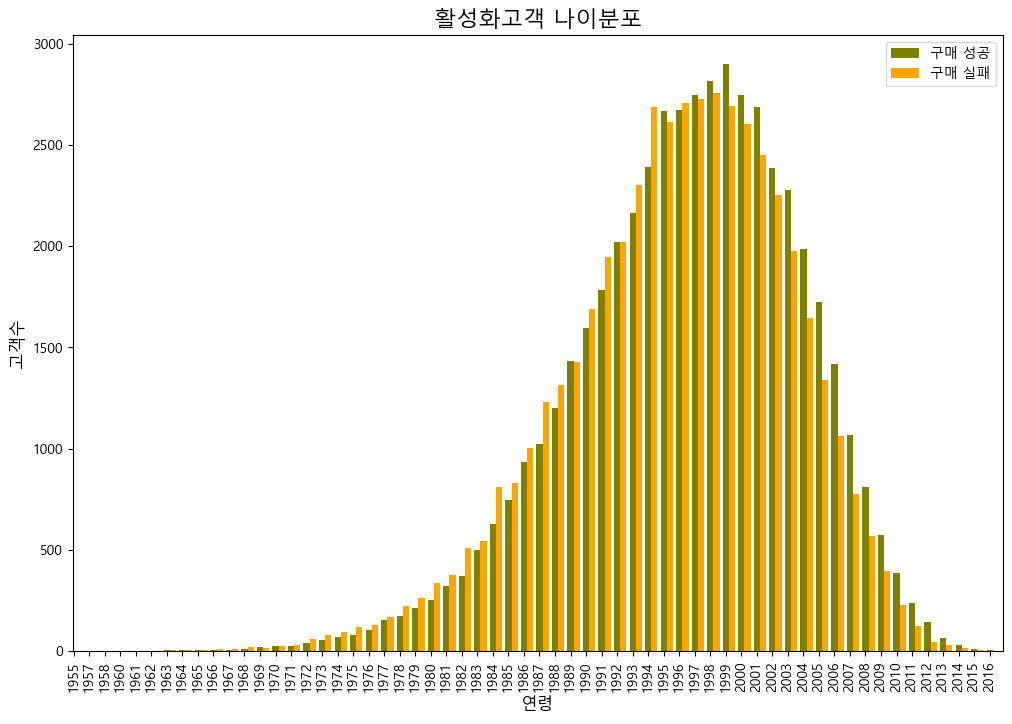

In [82]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12, 8))

# 활성화된 고객 나이 분포
purchase_age.plot(kind='bar', color='olive', label='구매 성공',width=0.4, align='center')

# 비활성화된 고객 나이 분포
not_purchase_age.plot(kind='bar', color='orange', label='구매 실패',width=0.4, align='edge', position=0)

plt.title('활성화고객 나이분포', fontsize=16)
plt.xlabel('연령', fontsize=12)
plt.ylabel('고객수', fontsize=12)
plt.legend()
plt.show()

In [94]:
int(customer['birthdate'].str[:4][0])

1996

In [97]:
# 나이계산
customer['age'] = 2023 - pd.to_numeric(customer['birthdate'].str[:4])

In [104]:
customer['age'] = customer['age'].astype(int)

In [156]:
a1 = customer[(customer['age'] >= 0) & (customer['age'] < 10)].groupby('purchase')['customer_id'].count()
a2 = customer[(customer['age'] >= 10) & (customer['age'] < 20)].groupby('purchase')['customer_id'].count()
a3 = customer[(customer['age'] >= 20) & (customer['age'] < 30)].groupby('purchase')['customer_id'].count()
a4 = customer[(customer['age'] >= 30) & (customer['age'] < 40)].groupby('purchase')['customer_id'].count()
a5 = customer[(customer['age'] >= 40) & (customer['age'] < 50)].groupby('purchase')['customer_id'].count()
a6 = customer[(customer['age'] >= 50) & (customer['age'] < 60)].groupby('purchase')['customer_id'].count()
a7 = customer[(customer['age'] >= 60) & (customer['age'] < 70)].groupby('purchase')['customer_id'].count()

In [169]:
a1

purchase
0    19
1    17
Name: customer_id, dtype: int64

In [170]:
customer_age = pd.DataFrame({'0':a1[0],'1':a1[1]}, index=[0])

In [171]:
customer_age.loc[1] = [a2[0],a2[1]]
customer_age.loc[2] = [a3[0],a3[1]]
customer_age.loc[3] = [a4[0],a4[1]]
customer_age.loc[4] = [a5[0],a5[1]]
customer_age.loc[5] = [a6[0],a6[1]]
customer_age.loc[6] = [a7[0],a7[1]]

In [172]:
customer_age

,0,1
0,19,17
1,6206,6444
2,25468,25885
3,14572,15292
4,2761,2786
5,257,263
6,12,18


<Axes: >

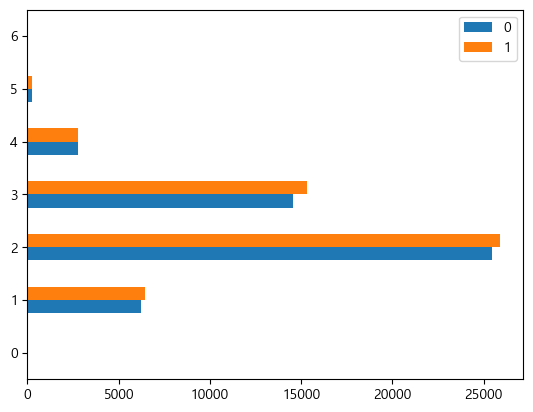

In [173]:
customer_age.plot(kind='barh')

In [176]:
customer[customer['purchase']==0].groupby('device_type')['device_type'].count()

device_type
Android    37705
iOS        11590
Name: device_type, dtype: int64

In [177]:
customer[customer['purchase']==1].groupby('device_type')['device_type'].count()

device_type
Android    38932
iOS        11773
Name: device_type, dtype: int64

### 고객 구매 주기 계산

In [ ]:
customer_renew = pd.read_csv('customer_renew.csv')
merged_pro_trans = pd.read_csv('merged_pro_trans.csv')

In [ ]:
customer_renew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      100000 non-null  int64 
 1   gender           100000 non-null  object
 2   birthdate        100000 non-null  object
 3   first_join_date  100000 non-null  object
 4   promocode_use    100000 non-null  int64 
 5   repeated_buy     100000 non-null  int64 
 6   first_buy        100000 non-null  int64 
 7   last_buy         100000 non-null  int64 
 8   buy_count        100000 non-null  int64 
 9   buy_repeated     100000 non-null  int64 
 10  구매주기             100000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 8.4+ MB


In [ ]:
customer_renew['구매주기'].describe()

count    100000.000000
mean         63.047810
std         147.989722
min           0.000000
25%           0.000000
50%           0.000000
75%          49.000000
max        1110.000000
Name: 구매주기, dtype: float64

In [ ]:
customer_renew['구매주기'].median()

0.0

In [ ]:
customer_renew['first_join_date'].sort_values()

77238    2016-06-30
42782    2016-06-30
76057    2016-06-30
73575    2016-06-30
88919    2016-06-30
            ...    
1952     2022-07-31
96825    2022-07-31
5029     2022-07-31
74953    2022-07-31
95090    2022-07-31
Name: first_join_date, Length: 100000, dtype: object

In [ ]:
merged_pro_trans.created_at.sort_values()

1254461    2016-06-30T23:18:44.792905Z
1201589    2016-07-01T02:53:26.720195Z
1201590    2016-07-01T02:53:26.720195Z
1201721    2016-07-01T09:45:51.803842Z
1254460    2016-07-01T22:32:45.218400Z
                      ...             
985626     2022-07-31T23:58:50.469277Z
985568     2022-07-31T23:58:53.821469Z
985766     2022-07-31T23:59:03.408424Z
985569     2022-07-31T23:59:19.821469Z
985570     2022-07-31T23:59:45.821469Z
Name: created_at, Length: 1254585, dtype: object

In [ ]:
# 최근 2년 거래내역
recent2years = merged_pro_trans[(merged_pro_trans['date_str'] >= 20200801) & (merged_pro_trans['date_str'] <= 20220731)]

In [ ]:
recent2years

,Unnamed: 0,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_year,date_month
27,27,2020-08-20T11:41:15.365620Z,4774,784746bd-9adb-4c82-98f1-b51eeff756dc,e1a22441-74b7-409a-87eb-85b3192e5bed,Credit Card,Success,0,NaN,10000,...,Bangle,Gold,Summer,2012.0,Ethnic,Royal Diadem Set of 2 Golden Bangles,20200820,11:41:15.365620Z,2020,8
28,28,2020-10-06T11:51:47.365620Z,4774,dc3db6d2-20e7-4408-9fc7-37f6541da2fe,31dc3335-0759-428f-963a-80b8684c1fe5,Credit Card,Success,0,NaN,10000,...,Tshirts,White,Summer,2011.0,Casual,Myntra Men's Friend White T-shirt,20201006,11:51:47.365620Z,2020,10
29,29,2020-11-22T11:43:41.365620Z,4774,878f079d-93d8-428e-8f29-c4fd339d8309,5fc7f66d-d6d5-4245-9b05-72f39ae75640,Credit Card,Success,0,NaN,5000,...,Perfume and Body Mist,Silver,Spring,2017.0,Casual,Rasasi Women Emotion Perfume,20201122,11:43:41.365620Z,2020,11
30,30,2020-11-22T11:43:41.365620Z,4774,878f079d-93d8-428e-8f29-c4fd339d8309,5fc7f66d-d6d5-4245-9b05-72f39ae75640,Credit Card,Success,0,NaN,5000,...,Tshirts,Navy Blue,Summer,2012.0,Casual,Jack & Jones Men Note Navy Blue T-shirt,20201122,11:43:41.365620Z,2020,11
31,31,2021-01-08T11:24:54.365620Z,4774,752e6f17-216a-4801-b0b4-68908857f584,8f3c25e3-6529-469f-9b47-2acac609d93a,Credit Card,Success,0,NaN,0,...,Shirts,Purple,Summer,2012.0,Formal,John Miller Men Purple Shirt,20210108,11:24:54.365620Z,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254575,1254575,2022-07-07T09:48:29.144627Z,99675,1849df71-943e-431d-8731-35b75670203a,0aa7c9aa-517e-4c79-b691-137861f4e9af,Credit Card,Success,3388,XX2022,0,...,Earrings,Silver,Winter,2016.0,Ethnic,Fabindia Women Anusuya Silver Earrings,20220707,09:48:29.144627Z,2022,7
1254579,1254579,2020-11-12T18:19:20.074873Z,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,NaN,10000,...,Belts,Grey,Summer,2012.0,Casual,French Connection Women Grey Belt,20201112,18:19:20.074873Z,2020,11
1254580,1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,...,Tshirts,White,Summer,2012.0,Casual,Nike Men Printed White T-shirt,20210921,22:10:05.074873Z,2021,9
1254581,1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,...,Jackets,Blue,Summer,2011.0,Casual,ADIDAS Men Solid Blue Jacket,20211209,07:35:18.222046Z,2021,12


In [ ]:
customer_2years = customer.copy()

In [ ]:
# 최근 2년 구매 기록 확인
# 고객별로 구매 기록을 날짜 순서대로 정렬
customer_transactions = recent2years.sort_values(by=['customer_id', 'created_at'])

for i in range(len(customer_2years)):
    if customer_2years['customer_id'][i] in customer_transactions['customer_id'].values:
        customer_id = customer_2years['customer_id'][i]
        customer_transactions_filtered = customer_transactions[customer_transactions['customer_id'] == customer_id]
        customer_2years.loc[i, 'first_buy'] = customer_transactions_filtered['date_str'].iloc[0]
        customer_2years.loc[i, 'last_buy'] = customer_transactions_filtered['date_str'].iloc[-1]
        customer_2years.loc[i, 'buy_count'] = customer_transactions_filtered['date_str'].nunique()

In [ ]:
# 구매기록이 한번이라도 있으면 1 표기
for i in range(len(customer_2years)):
    if customer_2years['buy_count'][i] > 1:
        customer_2years.loc[i, 'buy_repeated'] = 1
    else: customer_2years.loc[i, 'buy_repeated'] = 0

In [ ]:
customer_2years['buy_count'] = customer_2years['buy_count'].fillna(0).astype('int')
customer_2years['buy_repeated']= customer_2years['buy_repeated'].astype('int')

In [ ]:
customer_2years = customer_2years[['customer_id','gender','birthdate','first_join_date','first_buy','last_buy','buy_count','buy_repeated']]

In [ ]:
# 타입 변경
customer_2years['first_buy'] = customer_2years['first_buy'].replace(0.0, 0)
customer_2years['first_buy'] = customer_2years['first_buy'].astype(float).astype('Int64')

C:\Users\user\AppData\Local\Temp\ipykernel_30180\1604360943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['first_buy'] = customer_2years['first_buy'].replace(0.0, 0)
C:\Users\user\AppData\Local\Temp\ipykernel_30180\1604360943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['first_buy'] = customer_2years['first_buy'].astype(float).astype('Int64')


In [ ]:
customer_2years['last_buy'] = customer_2years['last_buy'].replace(0.0, 0)
customer_2years['last_buy'] = customer_2years['last_buy'].astype(float).astype('Int64')


C:\Users\user\AppData\Local\Temp\ipykernel_30180\3929602874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['last_buy'] = customer_2years['last_buy'].replace(0.0, 0)
C:\Users\user\AppData\Local\Temp\ipykernel_30180\3929602874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['last_buy'] = customer_2years['last_buy'].astype(float).astype('Int64')


In [ ]:
from datetime import datetime

# 구매주기일 공식
# 최근 구매일 - 최초 구매일 / 구매횟수-1

for i in range(len(customer_2years)):

    if ((customer_2years['first_buy'][i]!=0) and (customer_2years['last_buy'][i] != 0)):

        date_str_first = str(customer_2years['first_buy'][i])
        date_str_last = str(customer_2years['last_buy'][i])

    
        first = datetime.strptime(date_str_first,"%Y%m%d")
        last = datetime.strptime(date_str_last,"%Y%m%d")

        if (customer_2years['buy_count'][i]-1) != 0:
            customer_2years.loc[i, '구매주기'] = (last - first).days / (customer_2years['buy_count'][i]-1)
        else: customer_2years.loc[i, '구매주기'] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_30180\2840202371.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years.loc[i, '구매주기'] = (last - first).days / (customer_2years['buy_count'][i]-1)


In [ ]:
customer_2years['구매주기'] = customer_2years['구매주기'].fillna(0).astype('int')

C:\Users\user\AppData\Local\Temp\ipykernel_30180\153515919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['구매주기'] = customer_2years['구매주기'].fillna(0).astype('int')


In [ ]:
customer_2years['구매주기'].describe()

count    100000.000000
mean         32.557940
std          68.200964
min           0.000000
25%           0.000000
50%           0.000000
75%          30.000000
max         368.000000
Name: 구매주기, dtype: float64

### 고객 구매 주기 분석

In [ ]:
customer_renew = pd.read_csv('customer_renew.csv')
merged_pro_trans = pd.read_csv('merged_pro_trans.csv')

In [ ]:
customer_renew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      100000 non-null  int64 
 1   gender           100000 non-null  object
 2   birthdate        100000 non-null  object
 3   first_join_date  100000 non-null  object
 4   promocode_use    100000 non-null  int64 
 5   repeated_buy     100000 non-null  int64 
 6   first_buy        100000 non-null  int64 
 7   last_buy         100000 non-null  int64 
 8   buy_count        100000 non-null  int64 
 9   buy_repeated     100000 non-null  int64 
 10  구매주기             100000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 8.4+ MB


In [ ]:
customer_renew['구매주기'].describe()

count    100000.000000
mean         63.047810
std         147.989722
min           0.000000
25%           0.000000
50%           0.000000
75%          49.000000
max        1110.000000
Name: 구매주기, dtype: float64

In [ ]:
customer_renew['구매주기'].median()

0.0

In [ ]:
customer_renew['first_join_date'].sort_values()

77238    2016-06-30
42782    2016-06-30
76057    2016-06-30
73575    2016-06-30
88919    2016-06-30
            ...    
1952     2022-07-31
96825    2022-07-31
5029     2022-07-31
74953    2022-07-31
95090    2022-07-31
Name: first_join_date, Length: 100000, dtype: object

In [ ]:
merged_pro_trans.created_at.sort_values()

1254461    2016-06-30T23:18:44.792905Z
1201589    2016-07-01T02:53:26.720195Z
1201590    2016-07-01T02:53:26.720195Z
1201721    2016-07-01T09:45:51.803842Z
1254460    2016-07-01T22:32:45.218400Z
                      ...             
985626     2022-07-31T23:58:50.469277Z
985568     2022-07-31T23:58:53.821469Z
985766     2022-07-31T23:59:03.408424Z
985569     2022-07-31T23:59:19.821469Z
985570     2022-07-31T23:59:45.821469Z
Name: created_at, Length: 1254585, dtype: object

In [ ]:
# 최근 2년 거래내역
recent2years = merged_pro_trans[(merged_pro_trans['date_str'] >= 20200801) & (merged_pro_trans['date_str'] <= 20220731)]

In [ ]:
recent2years

,Unnamed: 0,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_year,date_month
27,27,2020-08-20T11:41:15.365620Z,4774,784746bd-9adb-4c82-98f1-b51eeff756dc,e1a22441-74b7-409a-87eb-85b3192e5bed,Credit Card,Success,0,NaN,10000,...,Bangle,Gold,Summer,2012.0,Ethnic,Royal Diadem Set of 2 Golden Bangles,20200820,11:41:15.365620Z,2020,8
28,28,2020-10-06T11:51:47.365620Z,4774,dc3db6d2-20e7-4408-9fc7-37f6541da2fe,31dc3335-0759-428f-963a-80b8684c1fe5,Credit Card,Success,0,NaN,10000,...,Tshirts,White,Summer,2011.0,Casual,Myntra Men's Friend White T-shirt,20201006,11:51:47.365620Z,2020,10
29,29,2020-11-22T11:43:41.365620Z,4774,878f079d-93d8-428e-8f29-c4fd339d8309,5fc7f66d-d6d5-4245-9b05-72f39ae75640,Credit Card,Success,0,NaN,5000,...,Perfume and Body Mist,Silver,Spring,2017.0,Casual,Rasasi Women Emotion Perfume,20201122,11:43:41.365620Z,2020,11
30,30,2020-11-22T11:43:41.365620Z,4774,878f079d-93d8-428e-8f29-c4fd339d8309,5fc7f66d-d6d5-4245-9b05-72f39ae75640,Credit Card,Success,0,NaN,5000,...,Tshirts,Navy Blue,Summer,2012.0,Casual,Jack & Jones Men Note Navy Blue T-shirt,20201122,11:43:41.365620Z,2020,11
31,31,2021-01-08T11:24:54.365620Z,4774,752e6f17-216a-4801-b0b4-68908857f584,8f3c25e3-6529-469f-9b47-2acac609d93a,Credit Card,Success,0,NaN,0,...,Shirts,Purple,Summer,2012.0,Formal,John Miller Men Purple Shirt,20210108,11:24:54.365620Z,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254575,1254575,2022-07-07T09:48:29.144627Z,99675,1849df71-943e-431d-8731-35b75670203a,0aa7c9aa-517e-4c79-b691-137861f4e9af,Credit Card,Success,3388,XX2022,0,...,Earrings,Silver,Winter,2016.0,Ethnic,Fabindia Women Anusuya Silver Earrings,20220707,09:48:29.144627Z,2022,7
1254579,1254579,2020-11-12T18:19:20.074873Z,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,NaN,10000,...,Belts,Grey,Summer,2012.0,Casual,French Connection Women Grey Belt,20201112,18:19:20.074873Z,2020,11
1254580,1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,...,Tshirts,White,Summer,2012.0,Casual,Nike Men Printed White T-shirt,20210921,22:10:05.074873Z,2021,9
1254581,1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,...,Jackets,Blue,Summer,2011.0,Casual,ADIDAS Men Solid Blue Jacket,20211209,07:35:18.222046Z,2021,12


In [ ]:
customer_2years = customer.copy()

In [ ]:
# 최근 2년 구매 기록 확인
# 고객별로 구매 기록을 날짜 순서대로 정렬
customer_transactions = recent2years.sort_values(by=['customer_id', 'created_at'])

for i in range(len(customer_2years)):
    if customer_2years['customer_id'][i] in customer_transactions['customer_id'].values:
        customer_id = customer_2years['customer_id'][i]
        customer_transactions_filtered = customer_transactions[customer_transactions['customer_id'] == customer_id]
        customer_2years.loc[i, 'first_buy'] = customer_transactions_filtered['date_str'].iloc[0]
        customer_2years.loc[i, 'last_buy'] = customer_transactions_filtered['date_str'].iloc[-1]
        customer_2years.loc[i, 'buy_count'] = customer_transactions_filtered['date_str'].nunique()

In [ ]:
# 구매기록이 한번이라도 있으면 1 표기
for i in range(len(customer_2years)):
    if customer_2years['buy_count'][i] > 1:
        customer_2years.loc[i, 'buy_repeated'] = 1
    else: customer_2years.loc[i, 'buy_repeated'] = 0

In [ ]:
customer_2years['buy_count'] = customer_2years['buy_count'].fillna(0).astype('int')
customer_2years['buy_repeated']= customer_2years['buy_repeated'].astype('int')

In [ ]:
customer_2years = customer_2years[['customer_id','gender','birthdate','first_join_date','first_buy','last_buy','buy_count','buy_repeated']]

In [ ]:
# 타입 변경
customer_2years['first_buy'] = customer_2years['first_buy'].replace(0.0, 0)
customer_2years['first_buy'] = customer_2years['first_buy'].astype(float).astype('Int64')

C:\Users\user\AppData\Local\Temp\ipykernel_30180\1604360943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['first_buy'] = customer_2years['first_buy'].replace(0.0, 0)
C:\Users\user\AppData\Local\Temp\ipykernel_30180\1604360943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['first_buy'] = customer_2years['first_buy'].astype(float).astype('Int64')


In [ ]:
customer_2years['last_buy'] = customer_2years['last_buy'].replace(0.0, 0)
customer_2years['last_buy'] = customer_2years['last_buy'].astype(float).astype('Int64')


C:\Users\user\AppData\Local\Temp\ipykernel_30180\3929602874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['last_buy'] = customer_2years['last_buy'].replace(0.0, 0)
C:\Users\user\AppData\Local\Temp\ipykernel_30180\3929602874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['last_buy'] = customer_2years['last_buy'].astype(float).astype('Int64')


In [ ]:
from datetime import datetime

# 구매주기일 공식
# 최근 구매일 - 최초 구매일 / 구매횟수-1

for i in range(len(customer_2years)):

    if ((customer_2years['first_buy'][i]!=0) and (customer_2years['last_buy'][i] != 0)):

        date_str_first = str(customer_2years['first_buy'][i])
        date_str_last = str(customer_2years['last_buy'][i])

    
        first = datetime.strptime(date_str_first,"%Y%m%d")
        last = datetime.strptime(date_str_last,"%Y%m%d")

        if (customer_2years['buy_count'][i]-1) != 0:
            customer_2years.loc[i, '구매주기'] = (last - first).days / (customer_2years['buy_count'][i]-1)
        else: customer_2years.loc[i, '구매주기'] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_30180\2840202371.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years.loc[i, '구매주기'] = (last - first).days / (customer_2years['buy_count'][i]-1)


In [ ]:
customer_2years['구매주기'] = customer_2years['구매주기'].fillna(0).astype('int')

C:\Users\user\AppData\Local\Temp\ipykernel_30180\153515919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['구매주기'] = customer_2years['구매주기'].fillna(0).astype('int')


In [ ]:
customer_2years['구매주기'].describe()

count    100000.000000
mean         32.557940
std          68.200964
min           0.000000
25%           0.000000
50%           0.000000
75%          30.000000
max         368.000000
Name: 구매주기, dtype: float64

In [143]:
customer_renew = pd.read_csv('customer_renew.csv')

In [144]:
customer_renew['first_buy'].unique()

array([       0, 20200823, 20210416, ..., 20170224, 20160630, 20161124],
      dtype=int64)

In [145]:
cycle0 = customer_renew[customer_renew['구매주기'] == 0]['customer_id'].count()
cycle1 = customer_renew[(0 < customer_renew['구매주기']) & (customer_renew['구매주기']<= 7)]['customer_id'].count()
cycle2 = customer_renew[(7 < customer_renew['구매주기']) & (customer_renew['구매주기']<= 14)]['customer_id'].count()
cycle3 = customer_renew[(14 < customer_renew['구매주기']) & (customer_renew['구매주기']<= 21)]['customer_id'].count()
cycle4 = customer_renew[(21 < customer_renew['구매주기']) & (customer_renew['구매주기']<= 28)]['customer_id'].count()
cycle5 = customer_renew[(customer_renew['구매주기']>=29)]['customer_id'].count()


In [146]:
cycle3

2827

In [147]:
# 평균 구매주기
customer_renew['구매주기'].mean()

63.04781

In [148]:
# 구매주기 구간별 고객수
cycle_df = pd.DataFrame({'구매주기기간':['0일','-7일','-14일','-21일','-28일','29일-'],'고객수':[cycle0,cycle1,cycle2,cycle3,cycle4,cycle5]})

In [149]:
cycle_df

,구매주기기간,고객수
0,0일,59639
1,-7일,1675
2,-14일,2922
3,-21일,2827
4,-28일,2465
5,29일-,30472


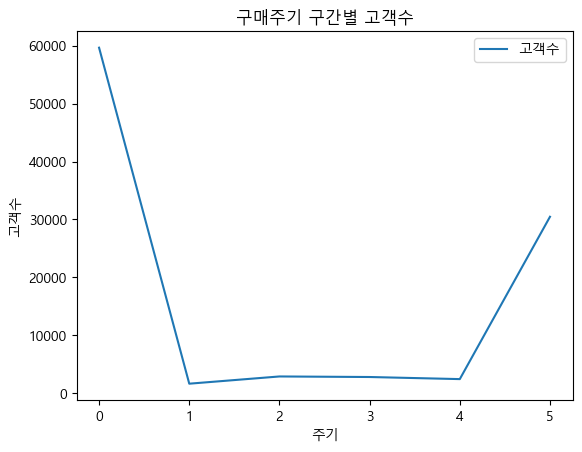

In [150]:
import matplotlib.pyplot as plt

cycle_df.plot(kind='line')

plt.title('구매주기 구간별 고객수')
plt.xlabel('주기')
plt.xticks()
plt.ylabel('고객수')

plt.show()


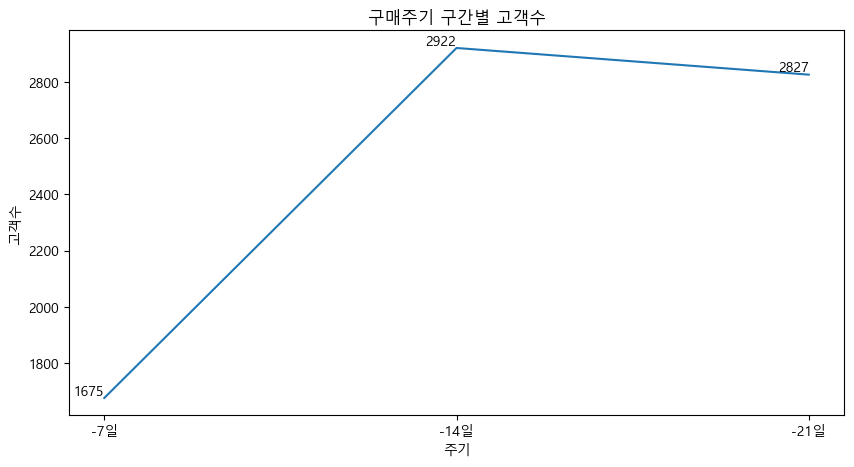

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

subset_df = cycle_df.iloc[1:4]  # 두 번째 행부터 네 번째 행까지 선택
x = range(len(subset_df))  # x축에 사용할 범위 생성

plt.plot(x, subset_df['고객수'])  # x에 대응하는 y값으로 '고객수' 컬럼 사용

plt.title('구매주기 구간별 고객수')
plt.xlabel('주기')
plt.xticks(x, subset_df['구매주기기간'])
plt.ylabel('고객수')

for i, v in enumerate(subset_df['고객수']):
    plt.text(i, v, str(v), ha='right', va='bottom')

plt.show()

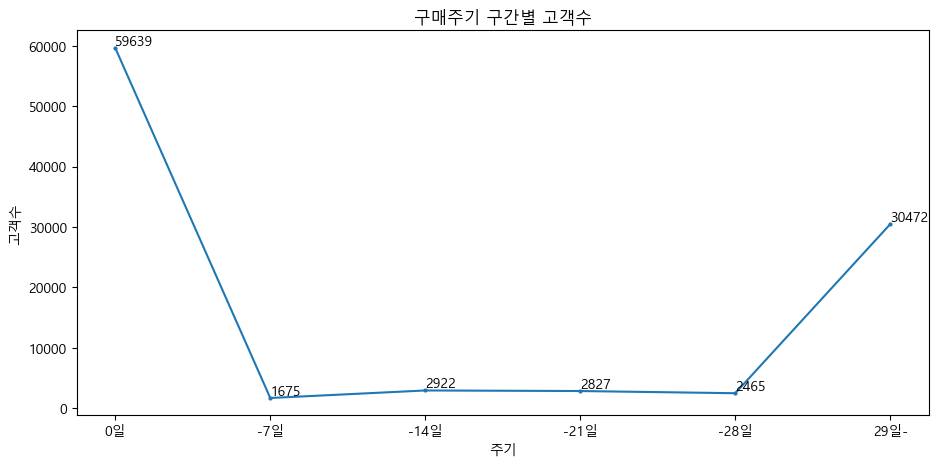

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 5))

plt.plot(cycle_df['구매주기기간'], cycle_df['고객수'], marker='o', markersize=2)

plt.title('구매주기 구간별 고객수')
plt.xlabel('주기')
plt.ylabel('고객수')

# x축 눈금 설정
x_positions = range(len(cycle_df))
x_labels = cycle_df['구매주기기간'].tolist()
plt.xticks(x_positions, x_labels)

# 각 데이터 포인트에 해당하는 고객 수 표시
for x, y in zip(x_positions, cycle_df['고객수']):
    plt.text(x, y, str(y), ha='left', va='bottom')

plt.show()

#### 구매 안한 경우 제외하고 구매주기 그리기

In [153]:
# 한번도 구매하지 않은 경우를 제외한 df 생성
customer_renew_nobuy = customer_renew[customer_renew['buy_count']!=0].reset_index(drop=True)

In [154]:
customer_renew_nobuy

,customer_id,gender,birthdate,first_join_date,promocode_use,repeated_buy,first_buy,last_buy,buy_count,buy_repeated,구매주기
0,7279,M,1989-01-23,2020-08-23,1,1,20200823,20220729,89,1,8
1,82542,M,2000-07-15,2021-04-11,0,0,20210416,20210416,1,0,0
2,96453,F,2005-02-12,2022-01-09,1,0,20220110,20220422,2,1,102
3,8031,F,1995-11-01,2019-09-12,1,1,20190916,20210818,3,1,351
4,9152,F,1995-12-10,2019-11-21,1,0,20191121,20210907,3,1,328
...,...,...,...,...,...,...,...,...,...,...,...
50700,38690,F,1982-04-08,2017-07-30,1,1,20170801,20210930,6,1,304
50701,34743,M,2000-11-17,2020-10-17,1,1,20201017,20220727,37,1,18
50702,72065,M,1998-03-30,2017-11-25,1,1,20171125,20220629,44,1,39
50703,32818,F,1993-01-12,2018-09-01,1,1,20180902,20220729,96,1,15


In [155]:
cycle0 = customer_renew_nobuy[customer_renew_nobuy['구매주기'] == 0]['customer_id'].count()
cycle1 = customer_renew_nobuy[(0 < customer_renew_nobuy['구매주기']) & (customer_renew_nobuy['구매주기']<= 7)]['customer_id'].count()
cycle2 = customer_renew_nobuy[(7 < customer_renew_nobuy['구매주기']) & (customer_renew_nobuy['구매주기']<= 14)]['customer_id'].count()
cycle3 = customer_renew_nobuy[(14 < customer_renew_nobuy['구매주기']) & (customer_renew_nobuy['구매주기']<= 21)]['customer_id'].count()
cycle4 = customer_renew_nobuy[(21 < customer_renew_nobuy['구매주기']) & (customer_renew_nobuy['구매주기']<= 28)]['customer_id'].count()
cycle5 = customer_renew_nobuy[(customer_renew_nobuy['구매주기']>=29)]['customer_id'].count()

In [156]:
# 평균 구매주기
customer_renew_nobuy['구매주기'].mean()

124.34239226900701

In [157]:
customer_renew_nobuy['구매주기'].describe()

count    50705.000000
mean       124.342392
std        188.604482
min          0.000000
25%          9.000000
50%         47.000000
75%        151.000000
max       1110.000000
Name: 구매주기, dtype: float64

In [158]:
# 구매주기 구간별 고객수
cycle_df2 = pd.DataFrame({'구매주기기간':['0일','-7일','-14일','-21일','-28일','29일-'],'고객수':[cycle0,cycle1,cycle2,cycle3,cycle4,cycle5]})

In [159]:
cycle_df2

,구매주기기간,고객수
0,0일,10344
1,-7일,1675
2,-14일,2922
3,-21일,2827
4,-28일,2465
5,29일-,30472


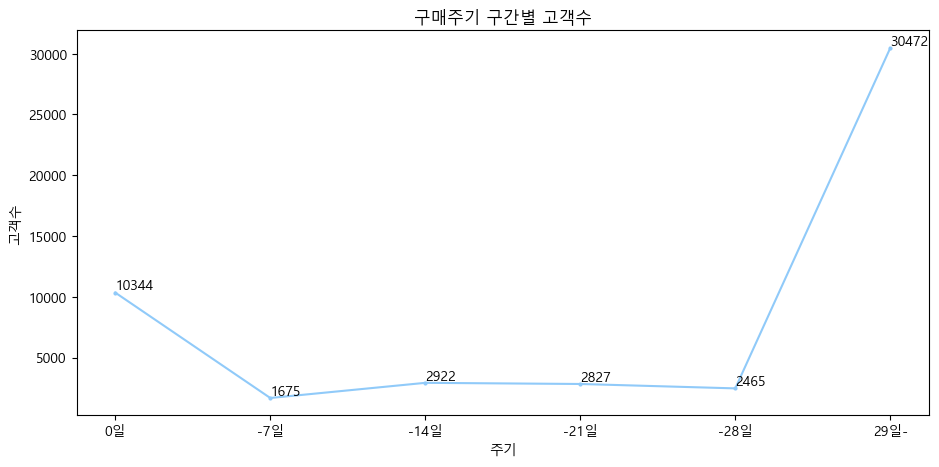

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 5))

plt.plot(cycle_df2['구매주기기간'], cycle_df2['고객수'], marker='o', markersize=2, color='#90CAF9')

plt.title('구매주기 구간별 고객수')
plt.xlabel('주기')
plt.ylabel('고객수')

# x축 눈금 설정
x_positions = range(len(cycle_df2))
x_labels = cycle_df2['구매주기기간'].tolist()
plt.xticks(x_positions, x_labels)

# 각 데이터 포인트에 해당하는 고객 수 표시
for x, y in zip(x_positions, cycle_df2['고객수']):
    plt.text(x, y, str(y), ha='left', va='bottom')

plt.show()

### 프로모션 할인율

In [166]:
# 프로모션 가격대별 개수
transaction.groupby('promo_amount').count()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
promo_amount,,,,,,,,,,,,,,,
0,773446,773446,773446,773446,773446,773446,0,773446,773446,773446,773446,773446,773446,773446,773446
235,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
255,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
317,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23550,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
23839,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
24153,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [171]:
# 필요한 열만 추출
transaction_sort_ = transaction.sort_values(['created_at','customer_id'])
light_transaction = transaction_sort_[['created_at','customer_id','promo_amount','promo_code','shipment_fee','total_amount','product_id','quantity','item_price']]

In [215]:
light_transaction['item_price'].describe()

count    1.254585e+06
mean     2.499744e+05
std      1.118733e+05
min      5.600000e+03
25%      1.683730e+05
50%      2.335400e+05
75%      3.136470e+05
max      1.200357e+06
Name: item_price, dtype: float64

In [218]:
light_transaction.groupby(['created_at', 'customer_id']).count()

,,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price
created_at,customer_id,,,,,,,
2016-06-30T23:18:44.792905Z,74089,1,0,1,1,1,1,1
2016-07-01T02:53:26.720195Z,6183,2,2,2,2,2,2,2
2016-07-01T09:45:51.803842Z,16228,1,0,1,1,1,1,1
2016-07-01T22:32:45.218400Z,73773,1,0,1,1,1,1,1
2016-07-02T05:28:40.302335Z,37770,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...
2022-07-31T23:58:50.469277Z,81975,4,0,4,4,4,4,4
2022-07-31T23:58:53.821469Z,19551,1,1,1,1,1,1,1
2022-07-31T23:59:03.408424Z,22285,1,0,1,1,1,1,1


In [221]:
light_transaction[light_transaction['customer_id']==81975].count()

created_at      57
customer_id     57
promo_amount    57
promo_code      11
shipment_fee    57
total_amount    57
product_id      57
quantity        57
item_price      57
dtype: int64

In [227]:
# 같은 날짜 제거 안한경우
# 할인된 가격
light_transaction['promo_price'] = light_transaction['item_price'] - light_transaction['promo_amount']

C:\Users\user\AppData\Local\Temp\ipykernel_17292\2390182125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light_transaction['promo_price'] = light_transaction['item_price'] - light_transaction['promo_amount']


In [228]:
# 상품별 할인율
light_transaction['discount_rate'] = (light_transaction['item_price'] - light_transaction['promo_price']) / light_transaction['item_price'] * 100

C:\Users\user\AppData\Local\Temp\ipykernel_17292\3024589985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light_transaction['discount_rate'] = (light_transaction['item_price'] - light_transaction['promo_price']) / light_transaction['item_price'] * 100


In [229]:
light_transaction['discount_rate'] = round(light_transaction['discount_rate'], 1)

C:\Users\user\AppData\Local\Temp\ipykernel_17292\2069659253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light_transaction['discount_rate'] = round(light_transaction['discount_rate'], 1)


In [231]:
light_transaction[light_transaction['discount_rate']>0].describe()

,customer_id,promo_amount,shipment_fee,total_amount,product_id,quantity,item_price,promo_price,discount_rate
count,481139.000000,481139.000000,481139.000000,4.811390e+05,481139.000000,481139.000000,4.811390e+05,4.811390e+05,481139.000000
mean,49728.301052,5337.291321,9161.313051,1.171774e+06,29747.264023,1.475274,2.498042e+05,2.444669e+05,2.669458
std,29001.205756,2644.178748,9314.059758,1.687859e+06,17049.716005,1.587243,1.119098e+05,1.119371e+05,2.142210
min,3.000000,235.000000,0.000000,1.341500e+04,1163.000000,1.000000,5.600000e+03,3.482000e+03,0.100000
25%,24380.000000,3447.000000,0.000000,2.433735e+05,14839.000000,1.000000,1.681505e+05,1.628570e+05,1.300000
50%,49431.000000,4847.000000,10000.000000,4.546640e+05,28677.000000,1.000000,2.333200e+05,2.280360e+05,2.100000
75%,74808.000000,6666.000000,10000.000000,1.371834e+06,44737.000000,1.000000,3.132740e+05,3.079480e+05,3.300000
max,99998.000000,24519.000000,50000.000000,2.170382e+07,60000.000000,41.000000,1.196775e+06,1.184740e+06,54.600000


In [173]:
# 같은 날짜에 같은 아이디가 있는 경우 첫 번째 행만 선택 → 할인율 확인 위함
light_transaction_first = light_transaction.groupby(['created_at', 'customer_id']).first().reset_index()

In [226]:
light_transaction_first[light_transaction_first['customer_id']==81975].count()

created_at       41
customer_id      41
promo_amount     41
promo_code       10
shipment_fee     41
total_amount     41
product_id       41
quantity         41
item_price       41
promo_price      41
discount_rate    41
dtype: int64

In [176]:
# 할인된 가격
light_transaction_first['promo_price'] = light_transaction_first['item_price'] - light_transaction_first['promo_amount']

In [178]:
# 상품별 할인율
light_transaction_first['discount_rate'] = (light_transaction_first['item_price'] - light_transaction_first['promo_price']) / light_transaction_first['item_price'] * 100

In [183]:
# 소수점 반올림
light_transaction_first['discount_rate'] = round(light_transaction_first['discount_rate'], 1)

In [205]:
light_transaction_first[light_transaction_first['discount_rate']>0].describe()

,customer_id,promo_amount,shipment_fee,total_amount,product_id,quantity,item_price,promo_price,discount_rate
count,326536.00000,326536.000000,326536.000000,3.265360e+05,326536.000000,326536.000000,3.265360e+05,3.265360e+05,326536.000000
mean,49803.87986,5331.856169,9202.951589,5.470341e+05,29762.347937,1.476995,2.499962e+05,2.446644e+05,2.666887
std,28998.71992,2638.815514,9367.322900,8.119309e+05,17059.362261,1.597017,1.119987e+05,1.120344e+05,2.142202
min,3.00000,235.000000,0.000000,1.341500e+04,1163.000000,1.000000,5.600000e+03,3.482000e+03,0.100000
25%,24448.00000,3447.000000,0.000000,2.002130e+05,14828.000000,1.000000,1.681252e+05,1.628222e+05,1.300000
50%,49577.00000,4844.000000,10000.000000,2.996870e+05,28709.500000,1.000000,2.335495e+05,2.282065e+05,2.100000
75%,74857.00000,6658.250000,10000.000000,5.120682e+05,44764.000000,1.000000,3.138265e+05,3.085135e+05,3.300000
max,99998.00000,24519.000000,50000.000000,2.170382e+07,60000.000000,41.000000,1.196775e+06,1.184740e+06,54.600000


<Axes: xlabel='discount_rate'>

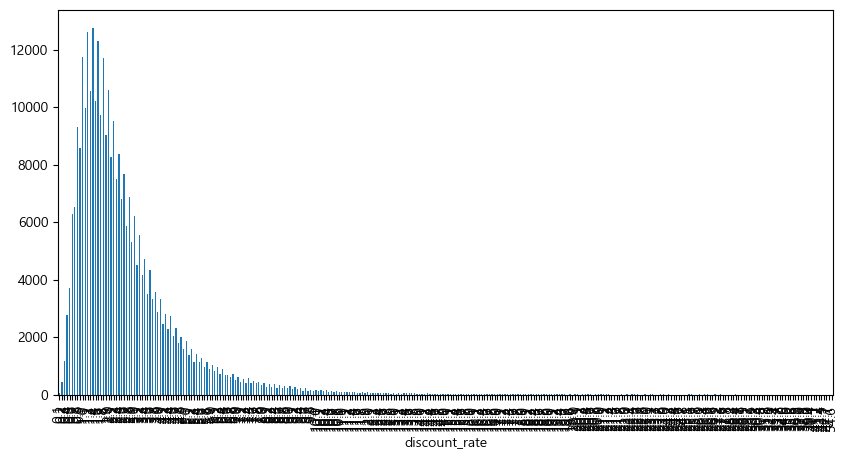

In [197]:
a = light_transaction_first[light_transaction_first['discount_rate']>0].groupby('discount_rate')['created_at'].count()
plt.figure(figsize=(10,5))
a.plot(kind='bar')

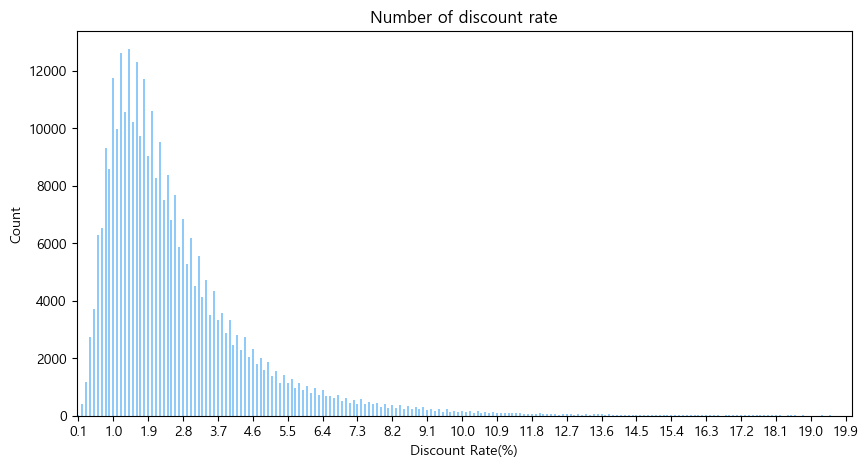

In [262]:
a = light_transaction_first[light_transaction_first['discount_rate'] > 0].groupby('discount_rate')['created_at'].count()
a = a[a.index <= 20]  # 할인율이 20 이하인 데이터만 선택

plt.figure(figsize=(10, 5))
a.plot(kind='bar', color='#90CAF9')

plt.title('Number of discount rate')
plt.xlabel('Discount Rate(%)')
plt.ylabel('Count')

# x 축 틱의 개수와 간격 설정
tick_indices = np.arange(0, len(a.index), step=9)
plt.xticks(tick_indices, a.index[tick_indices], rotation='horizontal')

plt.show()


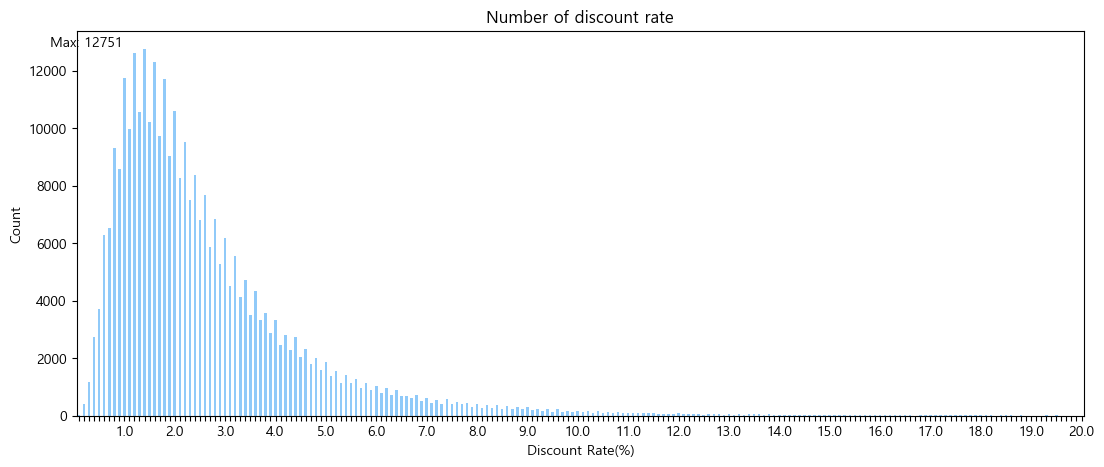

In [269]:
a = light_transaction_first[light_transaction_first['discount_rate'] > 0].groupby('discount_rate')['created_at'].count()
a = a[a.index <= 20]  # 할인율이 20 이하인 데이터만 선택

plt.figure(figsize=(13, 5))
bars = a.plot(kind='bar', color='#90CAF9')

plt.title('Number of discount rate')
plt.xlabel('Discount Rate(%)')
plt.ylabel('Count')

# x 축 틱의 개수와 간격 설정
tick_indices = np.arange(0, len(a.index), step=1)
tick_labels = [f"{i:.1f}" if i % 1 == 0 else "" for i in a.index[tick_indices]]
plt.xticks(tick_indices, tick_labels, rotation='horizontal')

# 각 막대의 위치 표시
#for i, bar in enumerate(bars.patches):
#    plt.text(bar.get_x() + bar.get_width() / 2, 0, f"{a.index[i]:.1f}", ha='center', va='bottom')

# 가장 높은 개수 정보 표시
max_count = a.max()
max_index = a.idxmax()
plt.text(max_index, max_count, f"Max: {max_count}", ha='center', va='bottom')

plt.show()

In [210]:
# 할인율 40%이상
light_transaction_first[light_transaction_first['discount_rate']>40]

,created_at,customer_id,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,promo_price,discount_rate
277200,2020-04-28T11:52:05.525939Z,33994,16071,SC2022,10000,111346,15733,3,39139,23068,41.1
317773,2020-07-27T00:38:11.182192Z,52313,4456,AZ2022,10000,38208,42672,4,8166,3710,54.6
339644,2020-09-08T02:08:07.582245Z,8071,14736,STARTUP,10000,142308,33630,4,36761,22025,40.1
350392,2020-09-28T23:04:38.560531Z,3680,8749,AZ2022,10000,21902,46694,1,20651,11902,42.4
426774,2021-02-12T18:46:59.502979Z,75096,6478,XX2022,10000,18754,45672,1,15232,8754,42.5
437095,2021-03-01T17:36:02.584636Z,44652,16105,SC2022,0,61063,9923,2,38584,22479,41.7
650360,2021-12-22T18:20:05.103853Z,54708,7164,BUYMORE,10000,19630,30235,1,16794,9630,42.7
665657,2022-01-09T21:42:47.665995Z,73811,8287,WEEKENDSERU,15000,59528,50420,3,17605,9318,47.1
